In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Setup**

In [ ]:
import os 
import re
import zipfile 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil 
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
processedDataset = pd.read_csv("/content/drive/MyDrive/41_softCom_project/training_data.csv")

In [ ]:
processedDataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1.0,1,1,1,1.0,21,4.5,3.5,1,36,1.0
1,29725,40,0.776,1.0,0,1,1,1.0,15,1.0,1.0,2,47,0.0
2,11561,21,0.624,1.5,0,3,1,1.0,5,4.5,3.5,0,83,0.0
3,33241,115,0.789,1.5,0,4,1,2.0,0,4.5,1.0,0,52,1.0
4,666,162,0.767,1.0,1,1,2,1.0,21,1.0,2.0,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1.0,0,1,1,4.0,14,4.5,3.5,1,42,1.0
19154,31398,103,0.920,1.0,1,1,1,1.0,14,4.5,3.5,4,52,1.0
19155,24576,103,0.920,1.0,1,1,1,1.0,21,1.0,1.0,4,44,0.0
19156,5756,65,0.802,1.0,1,1,3,3.5,0,8.0,1.0,6,97,0.0


In [ ]:
processedDataset.shape

(19158, 14)

In [ ]:
processedDataset = processedDataset.drop(columns=['enrollee_id'])

In [ ]:
processedDataset

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,1.0,1,1,1,1.0,21,4.5,3.5,1,36,1.0
1,40,0.776,1.0,0,1,1,1.0,15,1.0,1.0,2,47,0.0
2,21,0.624,1.5,0,3,1,1.0,5,4.5,3.5,0,83,0.0
3,115,0.789,1.5,0,4,1,2.0,0,4.5,1.0,0,52,1.0
4,162,0.767,1.0,1,1,2,1.0,21,1.0,2.0,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,1.0,0,1,1,4.0,14,4.5,3.5,1,42,1.0
19154,103,0.920,1.0,1,1,1,1.0,14,4.5,3.5,4,52,1.0
19155,103,0.920,1.0,1,1,1,1.0,21,1.0,1.0,4,44,0.0
19156,65,0.802,1.0,1,1,3,3.5,0,8.0,1.0,6,97,0.0


In [ ]:
#processedDataset['split'] = np.random.randn(processedDataset.shape[0], 1)
msk = np.random.rand(len(processedDataset)) <= 0.9
trainDataset = processedDataset[msk]
testDataset = processedDataset[~msk]

In [ ]:
trainDataset.head()


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,1.0,1,1,1,1.0,21,4.5,3.5,1,36,1.0
1,40,0.776,1.0,0,1,1,1.0,15,1.0,1.0,2,47,0.0
2,21,0.624,1.5,0,3,1,1.0,5,4.5,3.5,0,83,0.0
3,115,0.789,1.5,0,4,1,2.0,0,4.5,1.0,0,52,1.0
4,162,0.767,1.0,1,1,2,1.0,21,1.0,2.0,4,8,0.0


In [ ]:
trainDataset.shape

(17261, 13)

In [ ]:
testDataset.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
24,21,0.624,1.5,1,1,1,1.0,5,5.0,1.0,1,13,0.0
28,100,0.887,1.0,1,1,3,3.5,11,2.0,1.0,1,8,1.0
36,114,0.926,1.0,0,2,3,3.5,1,3.0,4.0,1,152,0.0
62,41,0.827,1.5,1,4,2,1.0,13,2.0,3.5,1,15,0.0
72,13,0.827,1.0,1,1,1,1.0,2,6.0,1.0,1,29,0.0


In [ ]:
testDataset.shape

(1897, 13)

# **Train 90 validation 10 Split**

In [ ]:
NormalizedDataset = np.float32(trainDataset.loc[:, trainDataset.columns != "target"].values)

In [ ]:
NormalizedDataset

array([[103.   ,   0.92 ,   1.   , ...,   3.5  ,   1.   ,  36.   ],
       [ 40.   ,   0.776,   1.   , ...,   1.   ,   2.   ,  47.   ],
       [ 21.   ,   0.624,   1.5  , ...,   3.5  ,   0.   ,  83.   ],
       ...,
       [103.   ,   0.92 ,   1.   , ...,   1.   ,   4.   ,  44.   ],
       [ 65.   ,   0.802,   1.   , ...,   1.   ,   6.   ,  97.   ],
       [ 67.   ,   0.855,   1.5  , ...,   3.5  ,   1.   , 127.   ]],
      dtype=float32)

In [ ]:
NormalizedDataset.shape

(17261, 12)

In [ ]:
labels = trainDataset.target.values

In [ ]:
labels.shape

(17261,)

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(NormalizedDataset, labels, test_size=0.1, random_state=42)


**here test set is the validation set**

In [ ]:
print(len(train_data), len(test_data))

15534 1727


In [ ]:
train_data = torch.from_numpy(train_data)
train_label = torch.from_numpy(train_label).type(torch.LongTensor)

test_data = torch.from_numpy(test_data)
test_label = torch.from_numpy(test_label).type(torch.LongTensor)




In [ ]:
train_data

tensor([[138.0000,   0.8360,   1.0000,  ...,   1.0000,   0.0000,  28.0000],
        [100.0000,   0.8870,   1.0000,  ...,   5.0000,   4.0000,   8.0000],
        [ 42.0000,   0.5630,   1.0000,  ...,   1.0000,   6.0000, 100.0000],
        ...,
        [ 21.0000,   0.6240,   1.0000,  ...,   3.5000,   0.0000,  13.0000],
        [126.0000,   0.4790,   1.0000,  ...,   5.0000,   1.0000,  22.0000],
        [ 16.0000,   0.9100,   1.0000,  ...,   1.0000,   6.0000,  74.0000]])

In [ ]:
train_data.shape


torch.Size([15534, 12])

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

# **Experiments**

# **Experiment 1**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import time
import torch
import torch.nn.functional as F


# import libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import time
import torch
import torch.nn.functional as F

#**Setup 1  Neural Network with 24 nodes and 2 hidden layers with ReLU Activation**



| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 100  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.001   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 100
num_iters = 10000
learning_rate = 0.001
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 12 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()


        ### Output layer: 100 --> 2
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)


        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.524173378944397. Accuracy: 75.07263219058687
Iteration: 1000. Loss: 0.5769591331481934. Accuracy: 75.07263219058687
Iteration: 1500. Loss: 0.47570979595184326. Accuracy: 75.07263219058687
Iteration: 2000. Loss: 0.5093508362770081. Accuracy: 75.07263219058687
Iteration: 2500. Loss: 0.6148724555969238. Accuracy: 74.95642068564788
Iteration: 3000. Loss: 0.47234317660331726. Accuracy: 75.07263219058687
Iteration: 3500. Loss: 0.5558146834373474. Accuracy: 75.07263219058687
Iteration: 4000. Loss: 0.5295441150665283. Accuracy: 75.07263219058687
Iteration: 4500. Loss: 0.5725484490394592. Accuracy: 75.13073794305636
Iteration: 5000. Loss: 0.5399248003959656. Accuracy: 75.13073794305636
Iteration: 5500. Loss: 0.6119303703308105. Accuracy: 74.95642068564788
Iteration: 6000. Loss: 0.5121816992759705. Accuracy: 75.07263219058687
Iteration: 6500. Loss: 0.5851671099662781. Accuracy: 74.89831493317838
Iteration: 7000. Loss: 0.5135626196861267. Accuracy: 74.72399767576991
Iterat

## Setup 1 Visualization

[0.524173378944397, 0.5769591331481934, 0.47570979595184326, 0.5093508362770081, 0.6148724555969238, 0.47234317660331726, 0.5558146834373474, 0.5295441150665283, 0.5725484490394592, 0.5399248003959656, 0.6119303703308105, 0.5121816992759705, 0.5851671099662781, 0.5135626196861267, 0.5257594585418701, 0.5743432641029358, 0.4764828085899353, 0.46732911467552185, 0.6061500310897827]


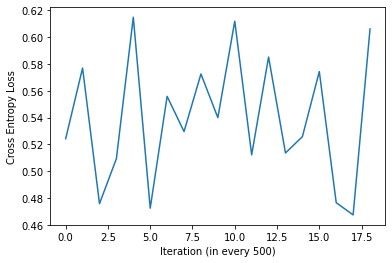

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 74.95642068564788, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.13073794305636, 75.13073794305636, 74.95642068564788, 75.07263219058687, 74.89831493317838, 74.72399767576991, 75.18884369552586, 74.89831493317838, 74.72399767576991, 75.18884369552586, 74.7821034282394]


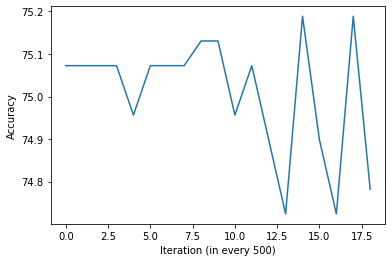

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 2  Neural Network with 100 nodes and 3 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 100  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.001   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 3  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 100
num_iters = 10000
learning_rate = 0.001
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()


        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.628003716468811. Accuracy: 75.07263219058687
Iteration: 1000. Loss: 0.42091214656829834. Accuracy: 75.07263219058687
Iteration: 1500. Loss: 0.5397130250930786. Accuracy: 75.07263219058687
Iteration: 2000. Loss: 0.5803970098495483. Accuracy: 75.07263219058687
Iteration: 2500. Loss: 0.5578118562698364. Accuracy: 75.07263219058687
Iteration: 3000. Loss: 0.6035144925117493. Accuracy: 75.07263219058687
Iteration: 3500. Loss: 0.5046586394309998. Accuracy: 75.07263219058687
Iteration: 4000. Loss: 0.49334338307380676. Accuracy: 75.07263219058687
Iteration: 4500. Loss: 0.5693644285202026. Accuracy: 75.01452643811737
Iteration: 5000. Loss: 0.5883290767669678. Accuracy: 75.01452643811737
Iteration: 5500. Loss: 0.5790375471115112. Accuracy: 75.01452643811737
Iteration: 6000. Loss: 0.5158001780509949. Accuracy: 75.01452643811737
Iteration: 6500. Loss: 0.4933337867259979. Accuracy: 74.89831493317838
Iteration: 7000. Loss: 0.594517171382904. Accuracy: 74.89831493317838
Iterati

## Setup 2 Visualization

[0.628003716468811, 0.42091214656829834, 0.5397130250930786, 0.5803970098495483, 0.5578118562698364, 0.6035144925117493, 0.5046586394309998, 0.49334338307380676, 0.5693644285202026, 0.5883290767669678, 0.5790375471115112, 0.5158001780509949, 0.4933337867259979, 0.594517171382904, 0.4769056737422943, 0.48344308137893677, 0.6028175354003906, 0.5318880677223206, 0.610944390296936]


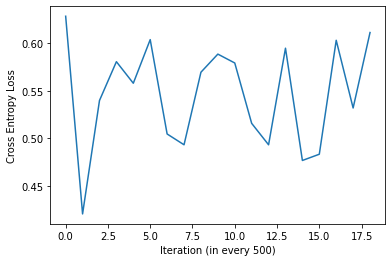

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.01452643811737, 75.01452643811737, 75.01452643811737, 75.01452643811737, 74.89831493317838, 74.89831493317838, 74.95642068564788, 75.01452643811737, 74.95642068564788, 75.07263219058687, 75.18884369552586]


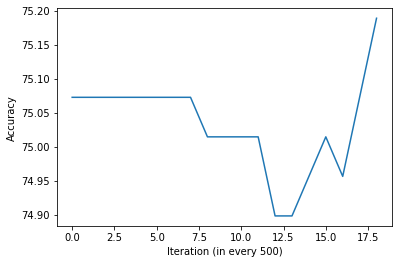

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 3  Neural Network with 100 nodes and 5 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 100  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.001   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 5  |




In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 100
num_iters = 10000
learning_rate = 0.01
num_hidden = 100

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5082706212997437. Accuracy: 75.07263219058687
Iteration: 1000. Loss: 0.5271220207214355. Accuracy: 75.07263219058687
Iteration: 1500. Loss: 0.5741459727287292. Accuracy: 75.18884369552586
Iteration: 2000. Loss: 0.5932871103286743. Accuracy: 75.07263219058687
Iteration: 2500. Loss: 0.4977111518383026. Accuracy: 75.07263219058687
Iteration: 3000. Loss: 0.5509994029998779. Accuracy: 75.07263219058687
Iteration: 3500. Loss: 0.5502241253852844. Accuracy: 75.07263219058687
Iteration: 4000. Loss: 0.5924741625785828. Accuracy: 75.07263219058687
Iteration: 4500. Loss: 0.5366508960723877. Accuracy: 75.07263219058687
Iteration: 5000. Loss: 0.5163753628730774. Accuracy: 75.07263219058687
Iteration: 5500. Loss: 0.5442333221435547. Accuracy: 74.95642068564788
Iteration: 6000. Loss: 0.5585270524024963. Accuracy: 75.07263219058687
Iteration: 6500. Loss: 0.4775196313858032. Accuracy: 75.01452643811737
Iteration: 7000. Loss: 0.48756521940231323. Accuracy: 75.01452643811737
Iterat

## Setup 3 Visualization

[0.5082706212997437, 0.5271220207214355, 0.5741459727287292, 0.5932871103286743, 0.4977111518383026, 0.5509994029998779, 0.5502241253852844, 0.5924741625785828, 0.5366508960723877, 0.5163753628730774, 0.5442333221435547, 0.5585270524024963, 0.4775196313858032, 0.48756521940231323, 0.481520414352417, 0.5849410891532898, 0.506045937538147, 0.5373409390449524, 0.625261664390564]


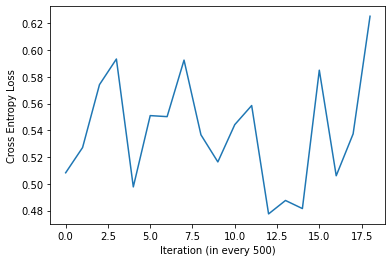

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.07263219058687, 75.07263219058687, 75.18884369552586, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 74.95642068564788, 75.07263219058687, 75.01452643811737, 75.01452643811737, 75.18884369552586, 75.13073794305636, 75.01452643811737, 75.13073794305636, 75.01452643811737]


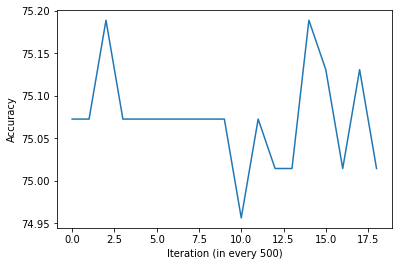

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Setup 4  Neural Network with 100 nodes and 7 hidden layers with ReLU Activation**

| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 100  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.001   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 7  |


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 100
num_iters = 10000
learning_rate = 0.001
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.6649455428123474. Accuracy: 75.07263219058687
Iteration: 1000. Loss: 0.579831063747406. Accuracy: 75.07263219058687
Iteration: 1500. Loss: 0.5551895499229431. Accuracy: 75.07263219058687
Iteration: 2000. Loss: 0.5508602261543274. Accuracy: 75.07263219058687
Iteration: 2500. Loss: 0.6539478898048401. Accuracy: 75.07263219058687
Iteration: 3000. Loss: 0.5911891460418701. Accuracy: 75.07263219058687
Iteration: 3500. Loss: 0.5603201389312744. Accuracy: 75.07263219058687
Iteration: 4000. Loss: 0.5535290837287903. Accuracy: 75.07263219058687
Iteration: 4500. Loss: 0.5931130051612854. Accuracy: 75.07263219058687
Iteration: 5000. Loss: 0.5273730754852295. Accuracy: 75.07263219058687
Iteration: 5500. Loss: 0.5107991695404053. Accuracy: 75.07263219058687
Iteration: 6000. Loss: 0.563758909702301. Accuracy: 75.07263219058687
Iteration: 6500. Loss: 0.5394443273544312. Accuracy: 75.07263219058687
Iteration: 7000. Loss: 0.521035373210907. Accuracy: 75.07263219058687
Iteration:

## Setup 3 Visualization

[0.6649455428123474, 0.579831063747406, 0.5551895499229431, 0.5508602261543274, 0.6539478898048401, 0.5911891460418701, 0.5603201389312744, 0.5535290837287903, 0.5931130051612854, 0.5273730754852295, 0.5107991695404053, 0.563758909702301, 0.5394443273544312, 0.521035373210907, 0.48487013578414917, 0.5150840282440186, 0.5513372421264648, 0.6102322936058044, 0.5334015488624573]


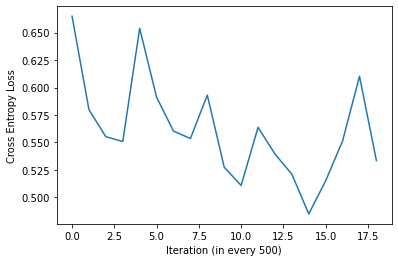

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687]


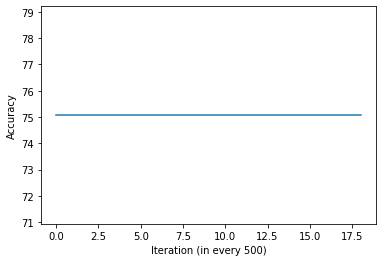

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 5  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 100  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.001   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 9  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 100
num_iters = 10000
learning_rate = 0.001
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.6371214389801025. Accuracy: 75.07263219058687
Iteration: 1000. Loss: 0.5996241569519043. Accuracy: 75.07263219058687
Iteration: 1500. Loss: 0.5374657511711121. Accuracy: 75.07263219058687
Iteration: 2000. Loss: 0.5789452195167542. Accuracy: 75.07263219058687
Iteration: 2500. Loss: 0.529590368270874. Accuracy: 75.07263219058687
Iteration: 3000. Loss: 0.5814697742462158. Accuracy: 75.07263219058687
Iteration: 3500. Loss: 0.5628818273544312. Accuracy: 75.07263219058687
Iteration: 4000. Loss: 0.501692533493042. Accuracy: 75.07263219058687
Iteration: 4500. Loss: 0.4993828535079956. Accuracy: 75.07263219058687
Iteration: 5000. Loss: 0.5300135016441345. Accuracy: 75.07263219058687
Iteration: 5500. Loss: 0.5821478366851807. Accuracy: 75.07263219058687
Iteration: 6000. Loss: 0.5402276515960693. Accuracy: 75.07263219058687
Iteration: 6500. Loss: 0.5724818706512451. Accuracy: 75.07263219058687
Iteration: 7000. Loss: 0.593590259552002. Accuracy: 75.07263219058687
Iteration:

## Setup 3 Visualization

[0.6371214389801025, 0.5996241569519043, 0.5374657511711121, 0.5789452195167542, 0.529590368270874, 0.5814697742462158, 0.5628818273544312, 0.501692533493042, 0.4993828535079956, 0.5300135016441345, 0.5821478366851807, 0.5402276515960693, 0.5724818706512451, 0.593590259552002, 0.626836359500885, 0.5716768503189087, 0.7019449472427368, 0.5842231512069702, 0.5703275203704834]


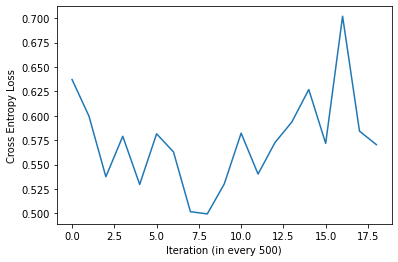

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687]


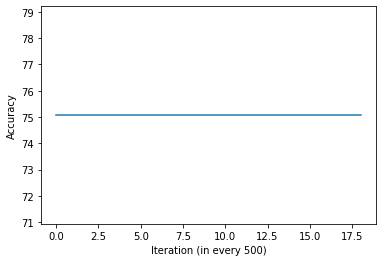

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 6  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 200  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 9  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 200
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5167601108551025. Accuracy: 75.07263219058687
Iteration: 1000. Loss: 0.5535873174667358. Accuracy: 75.07263219058687
Iteration: 1500. Loss: 0.573448896408081. Accuracy: 75.07263219058687
Iteration: 2000. Loss: 0.5654333233833313. Accuracy: 75.07263219058687
Iteration: 2500. Loss: 0.5003437995910645. Accuracy: 75.07263219058687
Iteration: 3000. Loss: 0.5905278325080872. Accuracy: 75.07263219058687
Iteration: 3500. Loss: 0.5008670687675476. Accuracy: 75.24694944799535
Iteration: 4000. Loss: 0.4623091220855713. Accuracy: 75.36316095293434
Iteration: 4500. Loss: 0.5243422985076904. Accuracy: 75.30505520046485
Iteration: 5000. Loss: 0.47694167494773865. Accuracy: 75.42126670540384
Iteration: 5500. Loss: 0.541446328163147. Accuracy: 75.24694944799535
Iteration: 6000. Loss: 0.5599673986434937. Accuracy: 75.24694944799535
Iteration: 6500. Loss: 0.5089044570922852. Accuracy: 75.24694944799535
Iteration: 7000. Loss: 0.5007379651069641. Accuracy: 75.36316095293434
Iteratio

## Setup 6 Visualization

[0.5167601108551025, 0.5535873174667358, 0.573448896408081, 0.5654333233833313, 0.5003437995910645, 0.5905278325080872, 0.5008670687675476, 0.4623091220855713, 0.5243422985076904, 0.47694167494773865, 0.541446328163147, 0.5599673986434937, 0.5089044570922852, 0.5007379651069641, 0.5105411410331726, 0.5187761783599854, 0.5306761264801025, 0.5409061312675476, 0.4757297933101654, 0.5320571660995483]


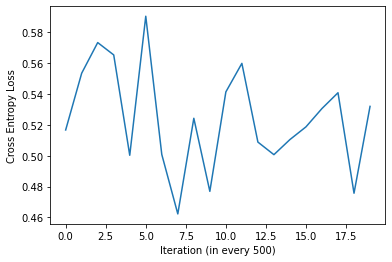

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.07263219058687, 75.24694944799535, 75.36316095293434, 75.30505520046485, 75.42126670540384, 75.24694944799535, 75.24694944799535, 75.24694944799535, 75.36316095293434, 75.47937245787332, 74.95642068564788, 75.18884369552586, 75.24694944799535, 75.07263219058687, 75.13073794305636]


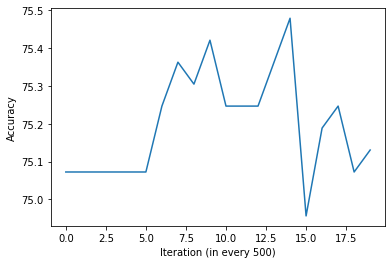

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 7  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 300  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 300
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5941132307052612. Accuracy: 75.13073794305636
Iteration: 1000. Loss: 0.5391046404838562. Accuracy: 75.13073794305636
Iteration: 1500. Loss: 0.5985277891159058. Accuracy: 75.13073794305636
Iteration: 2000. Loss: 0.5769689679145813. Accuracy: 75.13073794305636
Iteration: 2500. Loss: 0.5114373564720154. Accuracy: 75.13073794305636
Iteration: 3000. Loss: 0.5583255290985107. Accuracy: 75.13073794305636
Iteration: 3500. Loss: 0.561093270778656. Accuracy: 75.13073794305636
Iteration: 4000. Loss: 0.5630807876586914. Accuracy: 75.65368971528181
Iteration: 4500. Loss: 0.5417196750640869. Accuracy: 75.53747821034283
Iteration: 5000. Loss: 0.5207682251930237. Accuracy: 75.30505520046485
Iteration: 5500. Loss: 0.5643690228462219. Accuracy: 75.7699012202208
Iteration: 6000. Loss: 0.5539620518684387. Accuracy: 74.7821034282394
Iteration: 6500. Loss: 0.5036470293998718. Accuracy: 75.30505520046485
Iteration: 7000. Loss: 0.5229090452194214. Accuracy: 75.7117954677513
Iteration: 

## Setup 7 Visualization

[0.5941132307052612, 0.5391046404838562, 0.5985277891159058, 0.5769689679145813, 0.5114373564720154, 0.5583255290985107, 0.561093270778656, 0.5630807876586914, 0.5417196750640869, 0.5207682251930237, 0.5643690228462219, 0.5539620518684387, 0.5036470293998718, 0.5229090452194214, 0.5258385539054871, 0.5188461542129517, 0.4615132212638855, 0.49824386835098267, 0.48591873049736023, 0.5317150950431824]


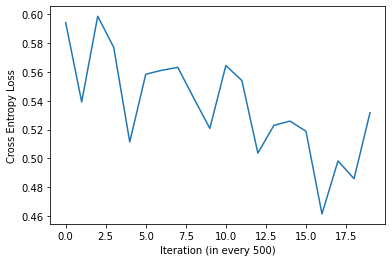

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.65368971528181, 75.53747821034283, 75.30505520046485, 75.7699012202208, 74.7821034282394, 75.30505520046485, 75.7117954677513, 75.53747821034283, 75.18884369552586, 75.30505520046485, 75.82800697269029, 75.7117954677513, 75.7699012202208]


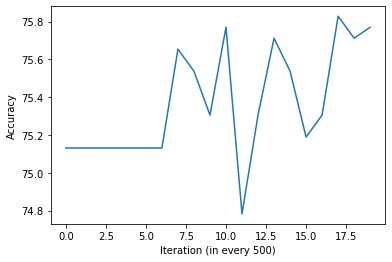

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 8  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 400  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 400
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5694645047187805. Accuracy: 75.13073794305636
Iteration: 1000. Loss: 0.5174464583396912. Accuracy: 75.13073794305636
Iteration: 1500. Loss: 0.5458818674087524. Accuracy: 75.13073794305636
Iteration: 2000. Loss: 0.5207711458206177. Accuracy: 75.13073794305636
Iteration: 2500. Loss: 0.5101422667503357. Accuracy: 75.13073794305636
Iteration: 3000. Loss: 0.5321710109710693. Accuracy: 75.13073794305636
Iteration: 3500. Loss: 0.4862183630466461. Accuracy: 75.13073794305636
Iteration: 4000. Loss: 0.5163037776947021. Accuracy: 75.13073794305636
Iteration: 4500. Loss: 0.5023404955863953. Accuracy: 75.13073794305636
Iteration: 5000. Loss: 0.5297846794128418. Accuracy: 75.59558396281231
Iteration: 5500. Loss: 0.5090672373771667. Accuracy: 75.30505520046485
Iteration: 6000. Loss: 0.5370736122131348. Accuracy: 75.59558396281231
Iteration: 6500. Loss: 0.5343181490898132. Accuracy: 75.7117954677513
Iteration: 7000. Loss: 0.4824920892715454. Accuracy: 75.65368971528181
Iteratio

## Setup 8 Visualization

[0.5694645047187805, 0.5174464583396912, 0.5458818674087524, 0.5207711458206177, 0.5101422667503357, 0.5321710109710693, 0.4862183630466461, 0.5163037776947021, 0.5023404955863953, 0.5297846794128418, 0.5090672373771667, 0.5370736122131348, 0.5343181490898132, 0.4824920892715454, 0.5065316557884216, 0.5425142049789429, 0.5444180965423584, 0.4654107689857483, 0.5015146732330322, 0.4869440793991089]


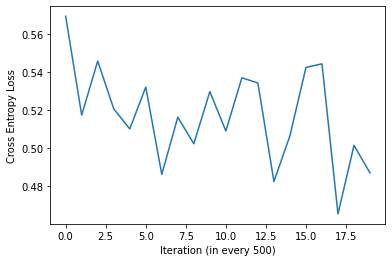

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.59558396281231, 75.30505520046485, 75.59558396281231, 75.7117954677513, 75.65368971528181, 75.82800697269029, 75.47937245787332, 75.88611272515979, 75.7117954677513, 75.65368971528181, 75.7699012202208]


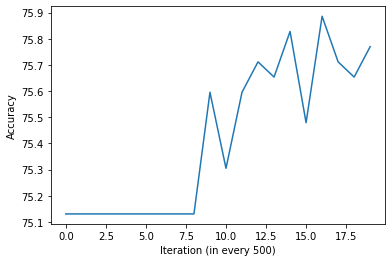

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 9  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 500  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 500
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5664201378822327. Accuracy: 75.13073794305636
Iteration: 1000. Loss: 0.5550874471664429. Accuracy: 75.13073794305636
Iteration: 1500. Loss: 0.5716903209686279. Accuracy: 75.13073794305636
Iteration: 2000. Loss: 0.5596664547920227. Accuracy: 75.13073794305636
Iteration: 2500. Loss: 0.5464131832122803. Accuracy: 75.13073794305636
Iteration: 3000. Loss: 0.5516645908355713. Accuracy: 75.13073794305636
Iteration: 3500. Loss: 0.5344496965408325. Accuracy: 75.13073794305636
Iteration: 4000. Loss: 0.5280340313911438. Accuracy: 75.13073794305636
Iteration: 4500. Loss: 0.5258274674415588. Accuracy: 75.13073794305636
Iteration: 5000. Loss: 0.5386120676994324. Accuracy: 75.13073794305636
Iteration: 5500. Loss: 0.5466899871826172. Accuracy: 75.13073794305636
Iteration: 6000. Loss: 0.49291905760765076. Accuracy: 75.13073794305636
Iteration: 6500. Loss: 0.5170193910598755. Accuracy: 75.13073794305636
Iteration: 7000. Loss: 0.5198473334312439. Accuracy: 75.13073794305636
Iterat

## Setup 9 Visualization

[0.5664201378822327, 0.5550874471664429, 0.5716903209686279, 0.5596664547920227, 0.5464131832122803, 0.5516645908355713, 0.5344496965408325, 0.5280340313911438, 0.5258274674415588, 0.5386120676994324, 0.5466899871826172, 0.49291905760765076, 0.5170193910598755, 0.5198473334312439, 0.5558580756187439, 0.5434649586677551, 0.49476003646850586, 0.5012476444244385, 0.5121366381645203]


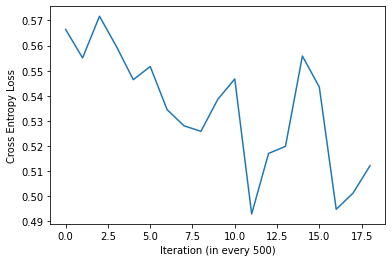

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.82800697269029, 76.11853573503777, 76.06042998256828]


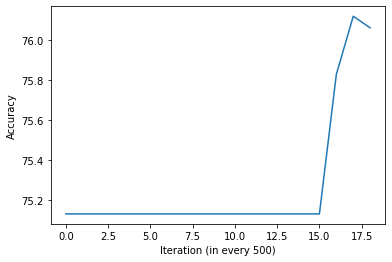

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 10  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 600  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 600
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.6029982566833496. Accuracy: 75.13073794305636
Iteration: 1000. Loss: 0.5720028281211853. Accuracy: 75.13073794305636
Iteration: 1500. Loss: 0.5332452058792114. Accuracy: 75.13073794305636
Iteration: 2000. Loss: 0.5297031402587891. Accuracy: 75.13073794305636
Iteration: 2500. Loss: 0.5850092768669128. Accuracy: 75.13073794305636
Iteration: 3000. Loss: 0.5378955602645874. Accuracy: 75.13073794305636
Iteration: 3500. Loss: 0.5387869477272034. Accuracy: 75.13073794305636
Iteration: 4000. Loss: 0.5205066204071045. Accuracy: 75.13073794305636
Iteration: 4500. Loss: 0.5557218790054321. Accuracy: 75.13073794305636
Iteration: 5000. Loss: 0.5254219174385071. Accuracy: 75.24694944799535
Iteration: 5500. Loss: 0.5166460275650024. Accuracy: 75.47937245787332
Iteration: 6000. Loss: 0.5228738784790039. Accuracy: 75.42126670540384
Iteration: 6500. Loss: 0.5752843022346497. Accuracy: 75.53747821034283
Iteration: 7000. Loss: 0.5233218669891357. Accuracy: 75.42126670540384
Iterati

## Setup 9 Visualization

[0.6029982566833496, 0.5720028281211853, 0.5332452058792114, 0.5297031402587891, 0.5850092768669128, 0.5378955602645874, 0.5387869477272034, 0.5205066204071045, 0.5557218790054321, 0.5254219174385071, 0.5166460275650024, 0.5228738784790039, 0.5752843022346497, 0.5233218669891357, 0.4954189658164978, 0.4900514781475067, 0.5370317101478577, 0.4857647716999054, 0.5042429566383362, 0.4814990758895874]


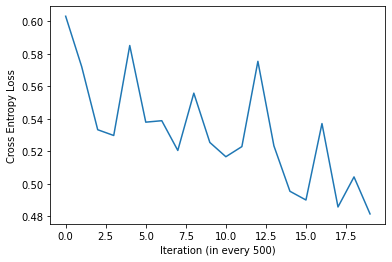

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.24694944799535, 75.47937245787332, 75.42126670540384, 75.53747821034283, 75.42126670540384, 75.18884369552586, 75.18884369552586, 75.30505520046485, 75.36316095293434, 75.53747821034283, 75.7117954677513]


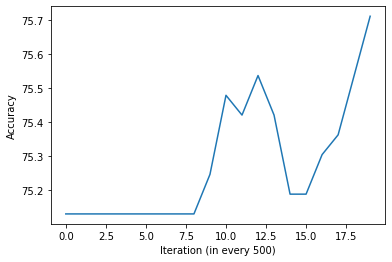

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 11  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 700  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 700
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5274916291236877. Accuracy: 75.13073794305636
Iteration: 1000. Loss: 0.5654160976409912. Accuracy: 75.13073794305636
Iteration: 1500. Loss: 0.5166422128677368. Accuracy: 75.13073794305636
Iteration: 2000. Loss: 0.5401660799980164. Accuracy: 75.13073794305636
Iteration: 2500. Loss: 0.5646395087242126. Accuracy: 75.13073794305636
Iteration: 3000. Loss: 0.5648953914642334. Accuracy: 75.13073794305636
Iteration: 3500. Loss: 0.5866622924804688. Accuracy: 75.13073794305636
Iteration: 4000. Loss: 0.5513814687728882. Accuracy: 75.13073794305636
Iteration: 4500. Loss: 0.5553495287895203. Accuracy: 75.13073794305636
Iteration: 5000. Loss: 0.5235711932182312. Accuracy: 75.13073794305636
Iteration: 5500. Loss: 0.49396398663520813. Accuracy: 75.13073794305636
Iteration: 6000. Loss: 0.5180079340934753. Accuracy: 75.13073794305636
Iteration: 6500. Loss: 0.5159100294113159. Accuracy: 75.59558396281231
Iteration: 7000. Loss: 0.5179557800292969. Accuracy: 75.36316095293434
Iterat

## Setup 11 Visualization

[0.5274916291236877, 0.5654160976409912, 0.5166422128677368, 0.5401660799980164, 0.5646395087242126, 0.5648953914642334, 0.5866622924804688, 0.5513814687728882, 0.5553495287895203, 0.5235711932182312, 0.49396398663520813, 0.5180079340934753, 0.5159100294113159, 0.5179557800292969, 0.5190032720565796, 0.5144960880279541, 0.5144235491752625, 0.5273032784461975, 0.518482506275177, 0.502733051776886]


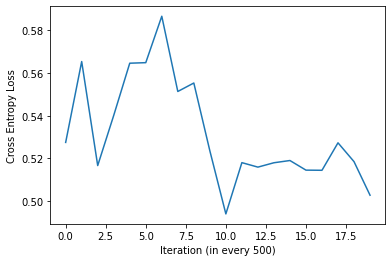

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.59558396281231, 75.36316095293434, 75.53747821034283, 76.23474723997676, 76.06042998256828, 75.18884369552586, 75.88611272515979, 76.00232423009878]


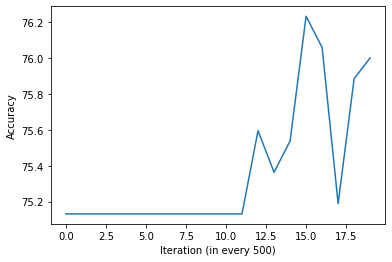

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 12  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5386025309562683. Accuracy: 75.13073794305636
Iteration: 1000. Loss: 0.5300923585891724. Accuracy: 75.13073794305636
Iteration: 1500. Loss: 0.6063125133514404. Accuracy: 75.13073794305636
Iteration: 2000. Loss: 0.5324046611785889. Accuracy: 75.13073794305636
Iteration: 2500. Loss: 0.6218294501304626. Accuracy: 75.13073794305636
Iteration: 3000. Loss: 0.6014565229415894. Accuracy: 75.13073794305636
Iteration: 3500. Loss: 0.5377733707427979. Accuracy: 75.13073794305636
Iteration: 4000. Loss: 0.5594075322151184. Accuracy: 75.13073794305636
Iteration: 4500. Loss: 0.519760251045227. Accuracy: 75.13073794305636
Iteration: 5000. Loss: 0.48117297887802124. Accuracy: 75.13073794305636
Iteration: 5500. Loss: 0.5610331296920776. Accuracy: 75.13073794305636
Iteration: 6000. Loss: 0.5183730125427246. Accuracy: 75.36316095293434
Iteration: 6500. Loss: 0.5308859348297119. Accuracy: 75.13073794305636
Iteration: 7000. Loss: 0.5093256831169128. Accuracy: 75.65368971528181
Iterati

## Setup 12 Visualization

[0.5386025309562683, 0.5300923585891724, 0.6063125133514404, 0.5324046611785889, 0.6218294501304626, 0.6014565229415894, 0.5377733707427979, 0.5594075322151184, 0.519760251045227, 0.48117297887802124, 0.5610331296920776, 0.5183730125427246, 0.5308859348297119, 0.5093256831169128, 0.5373066067695618, 0.5657239556312561, 0.5438188910484314, 0.5642049312591553, 0.5302008986473083, 0.5624077916145325]


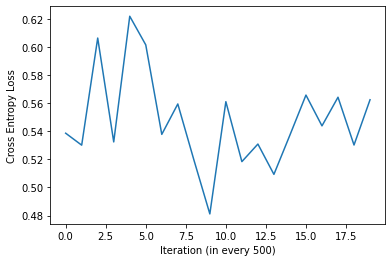

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.36316095293434, 75.13073794305636, 75.65368971528181, 75.59558396281231, 75.7699012202208, 75.94421847762929, 76.06042998256828, 76.40906449738524, 75.24694944799535]


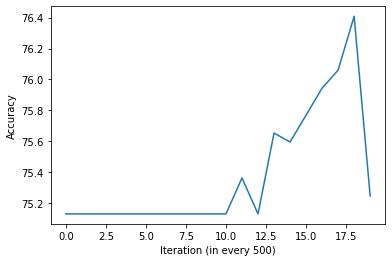

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 13  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 900  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 900
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5708614587783813. Accuracy: 75.13073794305636
Iteration: 1000. Loss: 0.5766751170158386. Accuracy: 75.13073794305636
Iteration: 1500. Loss: 0.5202307105064392. Accuracy: 75.13073794305636
Iteration: 2000. Loss: 0.5385894179344177. Accuracy: 75.13073794305636
Iteration: 2500. Loss: 0.540748119354248. Accuracy: 75.13073794305636
Iteration: 3000. Loss: 0.5404560565948486. Accuracy: 75.13073794305636
Iteration: 3500. Loss: 0.5273758769035339. Accuracy: 75.13073794305636
Iteration: 4000. Loss: 0.5187371373176575. Accuracy: 75.13073794305636
Iteration: 4500. Loss: 0.46755483746528625. Accuracy: 75.13073794305636
Iteration: 5000. Loss: 0.5214570164680481. Accuracy: 75.13073794305636
Iteration: 5500. Loss: 0.5302314758300781. Accuracy: 76.23474723997676
Iteration: 6000. Loss: 0.5496237277984619. Accuracy: 75.42126670540384
Iteration: 6500. Loss: 0.5719329118728638. Accuracy: 75.65368971528181
Iteration: 7000. Loss: 0.5042963624000549. Accuracy: 75.7117954677513
Iteratio

## Setup 13 Visualization

[0.5708614587783813, 0.5766751170158386, 0.5202307105064392, 0.5385894179344177, 0.540748119354248, 0.5404560565948486, 0.5273758769035339, 0.5187371373176575, 0.46755483746528625, 0.5214570164680481, 0.5302314758300781, 0.5496237277984619, 0.5719329118728638, 0.5042963624000549, 0.5162994861602783, 0.5281991958618164, 0.5082312226295471, 0.6426397562026978, 0.5060291886329651, 0.5355265736579895]


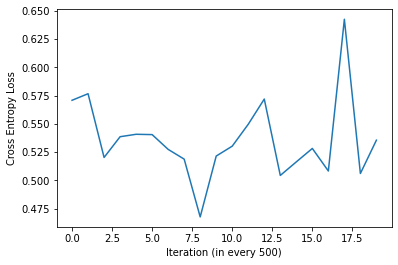

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 76.23474723997676, 75.42126670540384, 75.65368971528181, 75.7117954677513, 75.53747821034283, 75.65368971528181, 75.88611272515979, 72.45787332945962, 75.47937245787332, 75.7699012202208]


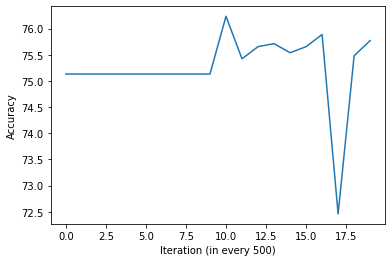

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 14  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 1000  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.03   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 1000
num_iters = 10000
learning_rate = 0.03
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.539551317691803. Accuracy: 75.13073794305636
Iteration: 1000. Loss: 0.5487451553344727. Accuracy: 75.13073794305636
Iteration: 1500. Loss: 0.5468929409980774. Accuracy: 75.13073794305636
Iteration: 2000. Loss: 0.5065662264823914. Accuracy: 75.13073794305636
Iteration: 2500. Loss: 0.5368218421936035. Accuracy: 75.13073794305636
Iteration: 3000. Loss: 0.575566828250885. Accuracy: 75.13073794305636
Iteration: 3500. Loss: 0.543236255645752. Accuracy: 75.13073794305636
Iteration: 4000. Loss: 0.5334541201591492. Accuracy: 75.13073794305636
Iteration: 4500. Loss: 0.5386520624160767. Accuracy: 75.13073794305636
Iteration: 5000. Loss: 0.5252723097801208. Accuracy: 75.13073794305636
Iteration: 5500. Loss: 0.5135895609855652. Accuracy: 75.65368971528181
Iteration: 6000. Loss: 0.5354403853416443. Accuracy: 75.65368971528181
Iteration: 6500. Loss: 0.5194725394248962. Accuracy: 75.7699012202208
Iteration: 7000. Loss: 0.4945916533470154. Accuracy: 75.53747821034283
Iteration: 

## Setup 14 Visualization

[0.539551317691803, 0.5487451553344727, 0.5468929409980774, 0.5065662264823914, 0.5368218421936035, 0.575566828250885, 0.543236255645752, 0.5334541201591492, 0.5386520624160767, 0.5252723097801208, 0.5135895609855652, 0.5354403853416443, 0.5194725394248962, 0.4945916533470154, 0.509495735168457, 0.5247421264648438, 0.5270670056343079, 0.49358412623405457, 0.5272959470748901, 0.527132511138916]


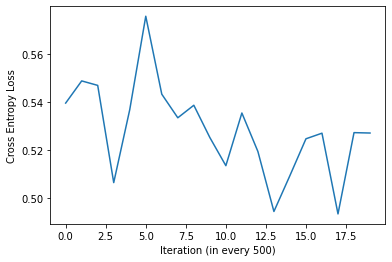

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.13073794305636, 75.65368971528181, 75.65368971528181, 75.7699012202208, 75.53747821034283, 75.7117954677513, 75.59558396281231, 75.59558396281231, 75.88611272515979, 76.06042998256828, 75.7117954677513]


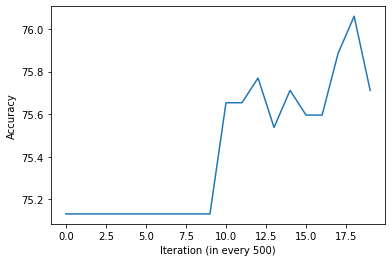

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 15  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.04   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.04
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5643479228019714. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5762428641319275. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.540607750415802. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.585138738155365. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5936821699142456. Accuracy: 76.23474723997676
Iteration: 3000. Loss: 0.501953125. Accuracy: 76.23474723997676
Iteration: 3500. Loss: 0.5434563159942627. Accuracy: 76.23474723997676
Iteration: 4000. Loss: 0.5117684602737427. Accuracy: 76.23474723997676
Iteration: 4500. Loss: 0.5275590419769287. Accuracy: 76.23474723997676
Iteration: 5000. Loss: 0.5290517807006836. Accuracy: 76.46717024985473
Iteration: 5500. Loss: 0.47507548332214355. Accuracy: 76.35095874491574
Iteration: 6000. Loss: 0.49575039744377136. Accuracy: 76.35095874491574
Iteration: 6500. Loss: 0.5027114748954773. Accuracy: 76.52527600232423
Iteration: 7000. Loss: 0.5528184771537781. Accuracy: 77.10633352701917
Iteration: 750

## Setup 15 Visualization

[0.5643479228019714, 0.5762428641319275, 0.540607750415802, 0.585138738155365, 0.5936821699142456, 0.501953125, 0.5434563159942627, 0.5117684602737427, 0.5275590419769287, 0.5290517807006836, 0.47507548332214355, 0.49575039744377136, 0.5027114748954773, 0.5528184771537781, 0.5168169736862183, 0.47898489236831665, 0.5049123764038086, 0.5012463331222534, 0.4505382478237152, 0.48712924122810364]


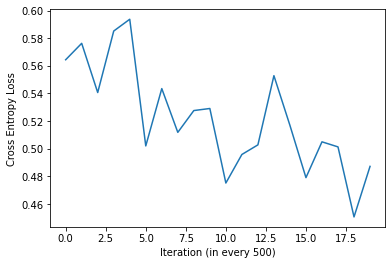

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.46717024985473, 76.35095874491574, 76.35095874491574, 76.52527600232423, 77.10633352701917, 76.52527600232423, 76.69959325973271, 77.16443927948868, 76.8739105171412, 77.04822777454969, 77.74549680418362]


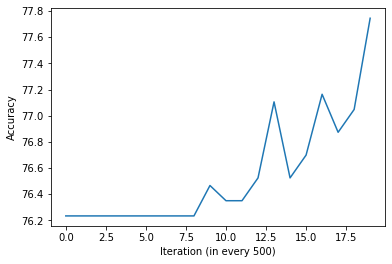

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 15.1 (copy again) Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 3000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.04   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.04
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5386754870414734. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.6020928025245667. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.5677432417869568. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5783576965332031. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5275982618331909. Accuracy: 76.23474723997676
Iteration: 3000. Loss: 0.6243482828140259. Accuracy: 76.23474723997676
Iteration: 3500. Loss: 0.5585947632789612. Accuracy: 76.23474723997676
Iteration: 4000. Loss: 0.5427292585372925. Accuracy: 76.23474723997676
Iteration: 4500. Loss: 0.5020630359649658. Accuracy: 76.23474723997676
Iteration: 5000. Loss: 0.5313553214073181. Accuracy: 76.23474723997676
Iteration: 5500. Loss: 0.579945981502533. Accuracy: 76.11853573503777
Iteration: 6000. Loss: 0.5114614367485046. Accuracy: 76.58338175479372
Iteration: 6500. Loss: 0.5429601669311523. Accuracy: 76.64148750726322
Iteration: 7000. Loss: 0.5204900503158569. Accuracy: 76.64148750726322
Iteratio

## Setup 15 Visualization

[0.5386754870414734, 0.6020928025245667, 0.5677432417869568, 0.5783576965332031, 0.5275982618331909, 0.6243482828140259, 0.5585947632789612, 0.5427292585372925, 0.5020630359649658, 0.5313553214073181, 0.579945981502533, 0.5114614367485046, 0.5429601669311523, 0.5204900503158569, 0.5183007717132568, 0.5156288743019104, 0.5640929341316223, 0.5225566029548645, 0.47982820868492126, 0.523289144039154, 0.45864301919937134, 0.5461727976799011, 0.44438788294792175, 0.5088382959365845, 0.4729902446269989, 0.564166247844696, 0.5154447555541992, 0.5058842897415161, 0.4453149735927582, 0.5064554214477539, 0.5251897573471069, 0.5240787267684937, 0.48621228337287903, 0.48080068826675415, 0.4536013603210449, 0.45054927468299866, 0.5032920837402344, 0.44967755675315857, 0.507821261882782, 0.506873369216919, 0.4648328125476837, 0.4548802375793457, 0.4588867425918579, 0.5377373695373535, 0.5274689793586731, 0.45074108242988586, 0.4993819296360016, 0.5001690983772278, 0.5119336247444153, 0.51708179712295

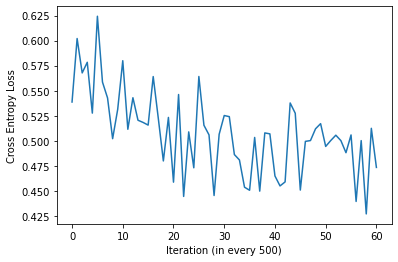

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.11853573503777, 76.58338175479372, 76.64148750726322, 76.64148750726322, 76.52527600232423, 76.46717024985473, 76.8739105171412, 76.64148750726322, 76.52527600232423, 76.58338175479372, 76.46717024985473, 76.8739105171412, 76.52527600232423, 76.69959325973271, 76.52527600232423, 76.11853573503777, 76.8158047646717, 76.64148750726322, 76.52527600232423, 76.8158047646717, 76.69959325973271, 76.17664148750727, 76.8739105171412, 77.28065078442766, 76.8158047646717, 76.8158047646717, 76.46717024985473, 76.69959325973271, 74.49157466589192, 76.46717024985473, 76.58338175479372, 76.75769901220221, 76.35095874491574, 76.40906449738524, 75.65368971528181, 76.69959325973271, 76.40906449738524, 76.40906449738524, 76.58338175479372, 77.04822777454969, 75.24694944799535, 76.8739105171412, 77.16443927948868, 

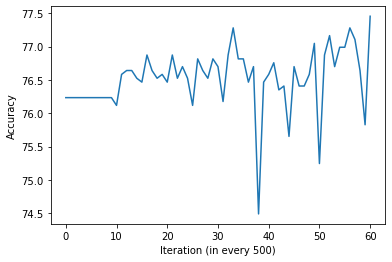

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 16  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.05   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.05
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5153781771659851. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5356172919273376. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.5383958220481873. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5440525412559509. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5632784962654114. Accuracy: 76.23474723997676
Iteration: 3000. Loss: 0.4883324205875397. Accuracy: 76.23474723997676
Iteration: 3500. Loss: 0.5142533183097839. Accuracy: 76.23474723997676
Iteration: 4000. Loss: 0.4720378816127777. Accuracy: 76.23474723997676
Iteration: 4500. Loss: 0.5351791381835938. Accuracy: 76.93201626961068
Iteration: 5000. Loss: 0.5318208336830139. Accuracy: 76.29285299244626
Iteration: 5500. Loss: 0.569688081741333. Accuracy: 76.64148750726322
Iteration: 6000. Loss: 0.6014386415481567. Accuracy: 76.35095874491574
Iteration: 6500. Loss: 0.5279144048690796. Accuracy: 76.40906449738524
Iteration: 7000. Loss: 0.5597025752067566. Accuracy: 76.58338175479372
Iteratio

## Setup 16 Visualization

[0.5153781771659851, 0.5356172919273376, 0.5383958220481873, 0.5440525412559509, 0.5632784962654114, 0.4883324205875397, 0.5142533183097839, 0.4720378816127777, 0.5351791381835938, 0.5318208336830139, 0.569688081741333, 0.6014386415481567, 0.5279144048690796, 0.5597025752067566, 0.4996500015258789, 0.5202623009681702, 0.5389660000801086, 0.5225131511688232, 0.5579466223716736, 0.5284976363182068]


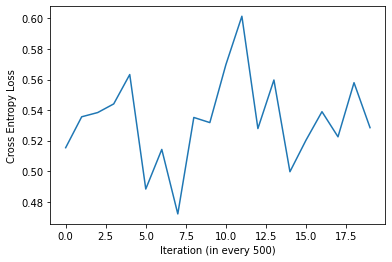

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.93201626961068, 76.29285299244626, 76.64148750726322, 76.35095874491574, 76.40906449738524, 76.58338175479372, 76.69959325973271, 76.46717024985473, 76.93201626961068, 76.75769901220221, 76.35095874491574, 76.46717024985473]


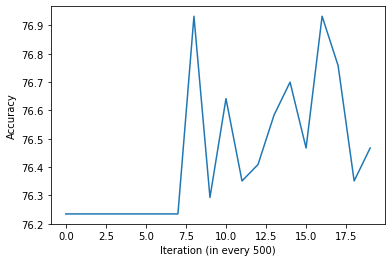

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 17  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.06   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.06
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5418938994407654. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5280840992927551. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.48928362131118774. Accuracy: 76.11853573503777
Iteration: 2000. Loss: 0.5397435426712036. Accuracy: 76.17664148750727
Iteration: 2500. Loss: 0.5201782584190369. Accuracy: 76.35095874491574
Iteration: 3000. Loss: 0.5776811242103577. Accuracy: 76.58338175479372
Iteration: 3500. Loss: 0.5064184069633484. Accuracy: 76.35095874491574
Iteration: 4000. Loss: 0.52252596616745. Accuracy: 76.8739105171412
Iteration: 4500. Loss: 0.5526350736618042. Accuracy: 76.75769901220221
Iteration: 5000. Loss: 0.5275683403015137. Accuracy: 76.58338175479372
Iteration: 5500. Loss: 0.48629888892173767. Accuracy: 76.52527600232423
Iteration: 6000. Loss: 0.5805356502532959. Accuracy: 76.35095874491574
Iteration: 6500. Loss: 0.49836045503616333. Accuracy: 76.64148750726322
Iteration: 7000. Loss: 0.5376559495925903. Accuracy: 77.10633352701917
Iterati

## Setup 17 Visualization

[0.5418938994407654, 0.5280840992927551, 0.48928362131118774, 0.5397435426712036, 0.5201782584190369, 0.5776811242103577, 0.5064184069633484, 0.52252596616745, 0.5526350736618042, 0.5275683403015137, 0.48629888892173767, 0.5805356502532959, 0.49836045503616333, 0.5376559495925903, 0.4408099949359894, 0.483428418636322, 0.510449230670929, 0.4969341456890106, 0.4830729365348816, 0.5179804563522339]


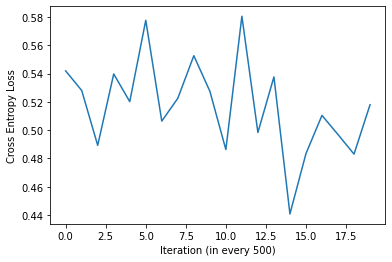

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.11853573503777, 76.17664148750727, 76.35095874491574, 76.58338175479372, 76.35095874491574, 76.8739105171412, 76.75769901220221, 76.58338175479372, 76.52527600232423, 76.35095874491574, 76.64148750726322, 77.10633352701917, 76.46717024985473, 76.8158047646717, 76.8739105171412, 75.94421847762929, 76.40906449738524, 77.04822777454969]


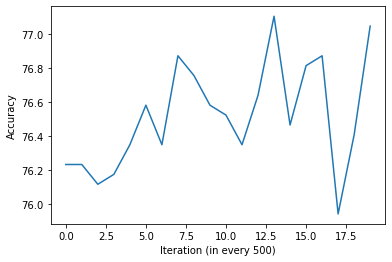

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 18  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.07   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.07
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5755098462104797. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5900737047195435. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.5828748941421509. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5837725400924683. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5418642163276672. Accuracy: 76.23474723997676
Iteration: 3000. Loss: 0.5289637446403503. Accuracy: 76.8158047646717
Iteration: 3500. Loss: 0.5750982165336609. Accuracy: 76.64148750726322
Iteration: 4000. Loss: 0.5226605534553528. Accuracy: 76.58338175479372
Iteration: 4500. Loss: 0.5835075378417969. Accuracy: 77.04822777454969
Iteration: 5000. Loss: 0.5476056337356567. Accuracy: 76.99012202208019
Iteration: 5500. Loss: 0.48197507858276367. Accuracy: 77.10633352701917
Iteration: 6000. Loss: 0.5433991551399231. Accuracy: 76.69959325973271
Iteration: 6500. Loss: 0.5275656580924988. Accuracy: 76.35095874491574
Iteration: 7000. Loss: 0.5408963561058044. Accuracy: 76.06042998256828
Iterati

## Setup 18 Visualization

[0.5755098462104797, 0.5900737047195435, 0.5828748941421509, 0.5837725400924683, 0.5418642163276672, 0.5289637446403503, 0.5750982165336609, 0.5226605534553528, 0.5835075378417969, 0.5476056337356567, 0.48197507858276367, 0.5433991551399231, 0.5275656580924988, 0.5408963561058044, 0.48206478357315063, 0.5395476222038269, 0.48549845814704895, 0.552626371383667, 0.4899396598339081, 0.5294971466064453]


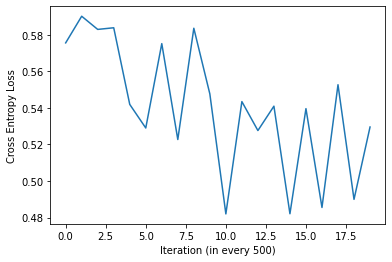

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.8158047646717, 76.64148750726322, 76.58338175479372, 77.04822777454969, 76.99012202208019, 77.10633352701917, 76.69959325973271, 76.35095874491574, 76.06042998256828, 76.8158047646717, 76.8739105171412, 76.93201626961068, 77.22254503195816, 76.8739105171412, 76.40906449738524]


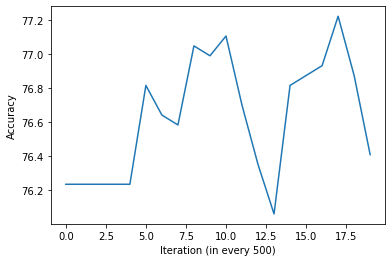

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 19  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.08   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.08
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5755098462104797. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5900737047195435. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.5828748941421509. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5837725400924683. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5418642163276672. Accuracy: 76.23474723997676
Iteration: 3000. Loss: 0.5289637446403503. Accuracy: 76.8158047646717
Iteration: 3500. Loss: 0.5750982165336609. Accuracy: 76.64148750726322
Iteration: 4000. Loss: 0.5226605534553528. Accuracy: 76.58338175479372
Iteration: 4500. Loss: 0.5835075378417969. Accuracy: 77.04822777454969
Iteration: 5000. Loss: 0.5476056337356567. Accuracy: 76.99012202208019
Iteration: 5500. Loss: 0.48197507858276367. Accuracy: 77.10633352701917
Iteration: 6000. Loss: 0.5433991551399231. Accuracy: 76.69959325973271
Iteration: 6500. Loss: 0.5275656580924988. Accuracy: 76.35095874491574
Iteration: 7000. Loss: 0.5408963561058044. Accuracy: 76.06042998256828
Iterati

## Setup 19 Visualization

[0.5755098462104797, 0.5900737047195435, 0.5828748941421509, 0.5837725400924683, 0.5418642163276672, 0.5289637446403503, 0.5750982165336609, 0.5226605534553528, 0.5835075378417969, 0.5476056337356567, 0.48197507858276367, 0.5433991551399231, 0.5275656580924988, 0.5408963561058044, 0.48206478357315063, 0.5395476222038269, 0.48549845814704895, 0.552626371383667, 0.4899396598339081, 0.5294971466064453]


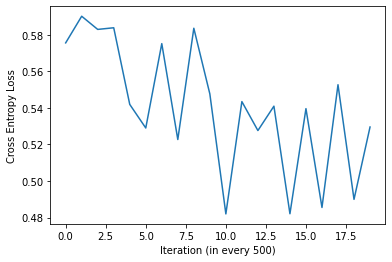

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.8158047646717, 76.64148750726322, 76.58338175479372, 77.04822777454969, 76.99012202208019, 77.10633352701917, 76.69959325973271, 76.35095874491574, 76.06042998256828, 76.8158047646717, 76.8739105171412, 76.93201626961068, 77.22254503195816, 76.8739105171412, 76.40906449738524]


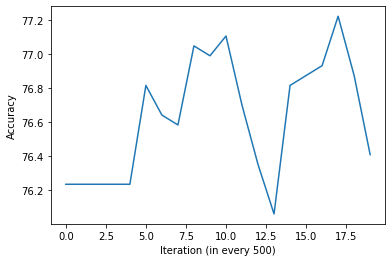

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 20  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.09   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.09
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5759149789810181. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5446040034294128. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.560770571231842. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5292858481407166. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5467838644981384. Accuracy: 76.29285299244626
Iteration: 3000. Loss: 0.5835604071617126. Accuracy: 76.52527600232423
Iteration: 3500. Loss: 0.5204923748970032. Accuracy: 76.40906449738524
Iteration: 4000. Loss: 0.5331547856330872. Accuracy: 76.64148750726322
Iteration: 4500. Loss: 0.5279043912887573. Accuracy: 76.52527600232423
Iteration: 5000. Loss: 0.5267402529716492. Accuracy: 76.40906449738524
Iteration: 5500. Loss: 0.5078542828559875. Accuracy: 76.29285299244626
Iteration: 6000. Loss: 0.5856995582580566. Accuracy: 76.46717024985473
Iteration: 6500. Loss: 0.4912361800670624. Accuracy: 76.64148750726322
Iteration: 7000. Loss: 0.4998069703578949. Accuracy: 76.46717024985473
Iteratio

## Setup 19 Visualization

[0.5759149789810181, 0.5446040034294128, 0.560770571231842, 0.5292858481407166, 0.5467838644981384, 0.5835604071617126, 0.5204923748970032, 0.5331547856330872, 0.5279043912887573, 0.5267402529716492, 0.5078542828559875, 0.5856995582580566, 0.4912361800670624, 0.4998069703578949, 0.48335757851600647, 0.5420263409614563, 0.5204953551292419, 0.49458202719688416, 0.5473492741584778, 0.462267130613327]


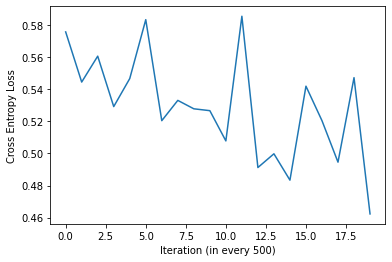

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.29285299244626, 76.52527600232423, 76.40906449738524, 76.64148750726322, 76.52527600232423, 76.40906449738524, 76.29285299244626, 76.46717024985473, 76.64148750726322, 76.46717024985473, 77.57117954677513, 76.93201626961068, 76.40906449738524, 76.69959325973271, 71.00522951772226, 76.23474723997676]


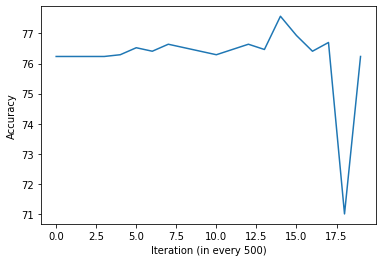

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 21  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.11   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.11
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5222510099411011. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.48306548595428467. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.5705531239509583. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5537497997283936. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5583400726318359. Accuracy: 75.94421847762929
Iteration: 3000. Loss: 0.523260772228241. Accuracy: 76.58338175479372
Iteration: 3500. Loss: 0.5147488117218018. Accuracy: 76.52527600232423
Iteration: 4000. Loss: 0.5762034058570862. Accuracy: 76.93201626961068
Iteration: 4500. Loss: 0.492325097322464. Accuracy: 76.64148750726322
Iteration: 5000. Loss: 0.5534712076187134. Accuracy: 75.13073794305636
Iteration: 5500. Loss: 0.5471338033676147. Accuracy: 76.29285299244626
Iteration: 6000. Loss: 0.539925754070282. Accuracy: 77.39686228936665
Iteration: 6500. Loss: 0.5312016606330872. Accuracy: 76.52527600232423
Iteration: 7000. Loss: 0.5212202668190002. Accuracy: 76.75769901220221
Iteration

## Setup 21 Visualization

[0.5222510099411011, 0.48306548595428467, 0.5705531239509583, 0.5537497997283936, 0.5583400726318359, 0.523260772228241, 0.5147488117218018, 0.5762034058570862, 0.492325097322464, 0.5534712076187134, 0.5471338033676147, 0.539925754070282, 0.5312016606330872, 0.5212202668190002, 0.4774860143661499, 0.5346161127090454, 0.48348385095596313, 0.583106279373169, 0.48888134956359863, 0.5253807902336121]


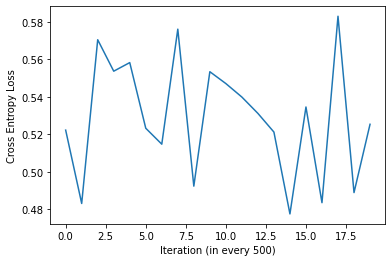

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 75.94421847762929, 76.58338175479372, 76.52527600232423, 76.93201626961068, 76.64148750726322, 75.13073794305636, 76.29285299244626, 77.39686228936665, 76.52527600232423, 76.75769901220221, 77.04822777454969, 77.10633352701917, 76.69959325973271, 75.18884369552586, 76.75769901220221, 76.17664148750727]


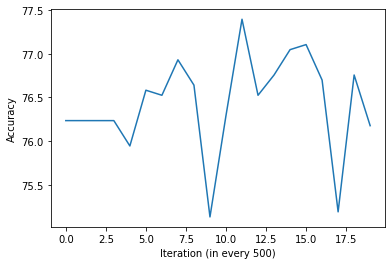

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 22  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.12   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.12
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5437998175621033. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5640149116516113. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.5149500370025635. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5243224501609802. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5380338430404663. Accuracy: 76.23474723997676
Iteration: 3000. Loss: 0.551432728767395. Accuracy: 76.40906449738524
Iteration: 3500. Loss: 0.5509418249130249. Accuracy: 76.75769901220221
Iteration: 4000. Loss: 0.46466898918151855. Accuracy: 76.40906449738524
Iteration: 4500. Loss: 0.5794602036476135. Accuracy: 76.75769901220221
Iteration: 5000. Loss: 0.5266441702842712. Accuracy: 77.16443927948868
Iteration: 5500. Loss: 0.5105624794960022. Accuracy: 76.69959325973271
Iteration: 6000. Loss: 0.5824453830718994. Accuracy: 76.69959325973271
Iteration: 6500. Loss: 0.4789745509624481. Accuracy: 76.52527600232423
Iteration: 7000. Loss: 0.491102397441864. Accuracy: 76.11853573503777
Iteratio

## Setup 22 Visualization

[0.5437998175621033, 0.5640149116516113, 0.5149500370025635, 0.5243224501609802, 0.5380338430404663, 0.551432728767395, 0.5509418249130249, 0.46466898918151855, 0.5794602036476135, 0.5266441702842712, 0.5105624794960022, 0.5824453830718994, 0.4789745509624481, 0.491102397441864, 0.49912387132644653, 0.5111725330352783, 0.4570835828781128, 0.5214052796363831, 0.5365828275680542, 0.46890780329704285]


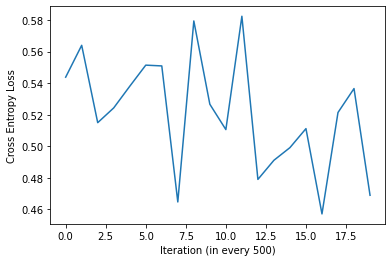

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.40906449738524, 76.75769901220221, 76.40906449738524, 76.75769901220221, 77.16443927948868, 76.69959325973271, 76.69959325973271, 76.52527600232423, 76.11853573503777, 77.57117954677513, 76.58338175479372, 76.35095874491574, 76.29285299244626, 76.29285299244626, 76.75769901220221]


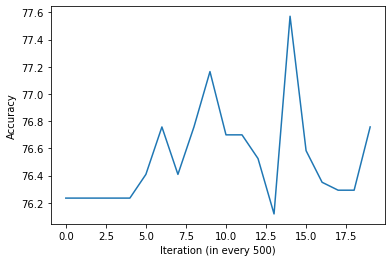

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 23  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.15   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.15
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5495043396949768. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5990319848060608. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.5746338963508606. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5554103851318359. Accuracy: 76.35095874491574
Iteration: 2500. Loss: 0.5636602640151978. Accuracy: 76.69959325973271
Iteration: 3000. Loss: 0.5409214496612549. Accuracy: 76.99012202208019
Iteration: 3500. Loss: 0.5789288878440857. Accuracy: 76.58338175479372
Iteration: 4000. Loss: 0.5871989130973816. Accuracy: 76.8158047646717
Iteration: 4500. Loss: 0.5066673159599304. Accuracy: 76.29285299244626
Iteration: 5000. Loss: 0.5428183674812317. Accuracy: 76.35095874491574
Iteration: 5500. Loss: 0.5296521782875061. Accuracy: 76.29285299244626
Iteration: 6000. Loss: 0.5212321281433105. Accuracy: 76.69959325973271
Iteration: 6500. Loss: 0.5509177446365356. Accuracy: 77.28065078442766
Iteration: 7000. Loss: 0.5446454286575317. Accuracy: 77.16443927948868
Iteratio

## Setup 23 Visualization

[0.5495043396949768, 0.5990319848060608, 0.5746338963508606, 0.5554103851318359, 0.5636602640151978, 0.5409214496612549, 0.5789288878440857, 0.5871989130973816, 0.5066673159599304, 0.5428183674812317, 0.5296521782875061, 0.5212321281433105, 0.5509177446365356, 0.5446454286575317, 0.506028950214386, 0.5069250464439392, 0.5437936186790466, 0.5156756043434143, 0.4945380389690399, 0.49880877137184143]


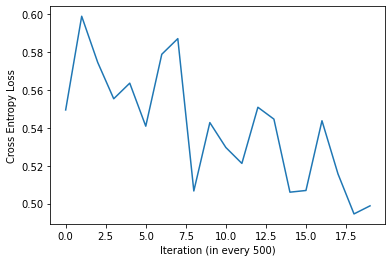

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.35095874491574, 76.69959325973271, 76.99012202208019, 76.58338175479372, 76.8158047646717, 76.29285299244626, 76.35095874491574, 76.29285299244626, 76.69959325973271, 77.28065078442766, 77.16443927948868, 76.40906449738524, 76.29285299244626, 76.06042998256828, 76.52527600232423, 76.40906449738524, 77.16443927948868]


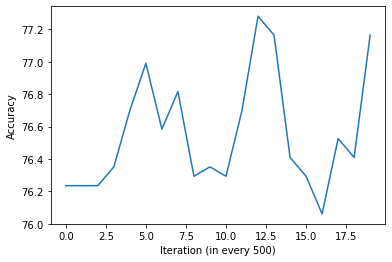

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 24  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.17
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5114234089851379. Accuracy: 76.23474723997676
Iteration: 1000. Loss: 0.5245677828788757. Accuracy: 76.23474723997676
Iteration: 1500. Loss: 0.537115216255188. Accuracy: 76.23474723997676
Iteration: 2000. Loss: 0.5386309623718262. Accuracy: 76.23474723997676
Iteration: 2500. Loss: 0.5227383375167847. Accuracy: 76.35095874491574
Iteration: 3000. Loss: 0.5220160484313965. Accuracy: 76.23474723997676
Iteration: 3500. Loss: 0.5704982876777649. Accuracy: 76.23474723997676
Iteration: 4000. Loss: 0.5326274633407593. Accuracy: 76.40906449738524
Iteration: 4500. Loss: 0.5238736867904663. Accuracy: 76.17664148750727
Iteration: 5000. Loss: 0.5157023668289185. Accuracy: 76.93201626961068
Iteration: 5500. Loss: 0.539883017539978. Accuracy: 75.94421847762929
Iteration: 6000. Loss: 0.5011338591575623. Accuracy: 77.10633352701917
Iteration: 6500. Loss: 0.4914529025554657. Accuracy: 76.75769901220221
Iteration: 7000. Loss: 0.4869461953639984. Accuracy: 76.52527600232423
Iteration

## Setup 24 Visualization

[0.5114234089851379, 0.5245677828788757, 0.537115216255188, 0.5386309623718262, 0.5227383375167847, 0.5220160484313965, 0.5704982876777649, 0.5326274633407593, 0.5238736867904663, 0.5157023668289185, 0.539883017539978, 0.5011338591575623, 0.4914529025554657, 0.4869461953639984, 0.4971657693386078, 0.48347008228302, 0.5436102151870728, 0.504135251045227, 0.5317546129226685, 0.5066161155700684]


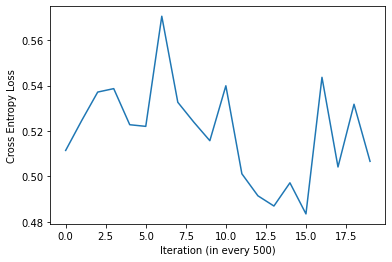

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[76.23474723997676, 76.23474723997676, 76.23474723997676, 76.23474723997676, 76.35095874491574, 76.23474723997676, 76.23474723997676, 76.40906449738524, 76.17664148750727, 76.93201626961068, 75.94421847762929, 77.10633352701917, 76.75769901220221, 76.52527600232423, 77.62928529924463, 78.09413131900058, 77.22254503195816, 77.16443927948868, 77.68739105171412, 76.64148750726322]


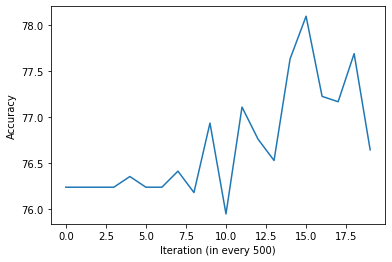

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 25  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.19   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.19
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5247318148612976. Accuracy: 75.27568195008706
Iteration: 1000. Loss: 0.5248643755912781. Accuracy: 75.27568195008706
Iteration: 1500. Loss: 0.5354625582695007. Accuracy: 75.27568195008706
Iteration: 2000. Loss: 0.5213330388069153. Accuracy: 75.27568195008706
Iteration: 2500. Loss: 0.5356393456459045. Accuracy: 75.27568195008706
Iteration: 3000. Loss: 0.5601150989532471. Accuracy: 75.85606500290191
Iteration: 3500. Loss: 0.5317660570144653. Accuracy: 75.79802669762043
Iteration: 4000. Loss: 0.5155625343322754. Accuracy: 75.27568195008706
Iteration: 4500. Loss: 0.5322228670120239. Accuracy: 75.33372025536855
Iteration: 5000. Loss: 0.4948120713233948. Accuracy: 75.68195008705746
Iteration: 5500. Loss: 0.5343741178512573. Accuracy: 76.3203714451538
Iteration: 6000. Loss: 0.544273853302002. Accuracy: 74.17295414973883
Iteration: 6500. Loss: 0.5815310478210449. Accuracy: 76.49448636099825
Iteration: 7000. Loss: 0.5112918019294739. Accuracy: 76.14625652930934
Iteration

## Setup 25 Visualization

[0.5247318148612976, 0.5248643755912781, 0.5354625582695007, 0.5213330388069153, 0.5356393456459045, 0.5601150989532471, 0.5317660570144653, 0.5155625343322754, 0.5322228670120239, 0.4948120713233948, 0.5343741178512573, 0.544273853302002, 0.5815310478210449, 0.5112918019294739, 0.44288769364356995, 0.5269802808761597, 0.48997417092323303, 0.5439193844795227, 0.508779764175415, 0.49186426401138306]


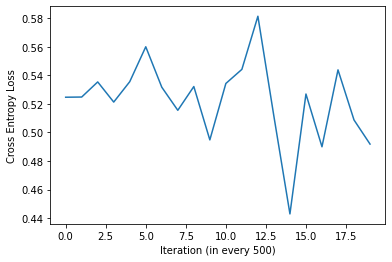

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 75.85606500290191, 75.79802669762043, 75.27568195008706, 75.33372025536855, 75.68195008705746, 76.3203714451538, 74.17295414973883, 76.49448636099825, 76.14625652930934, 76.20429483459083, 76.55252466627975, 76.43644805571677, 77.01683110853163, 75.9141033081834, 76.3203714451538]


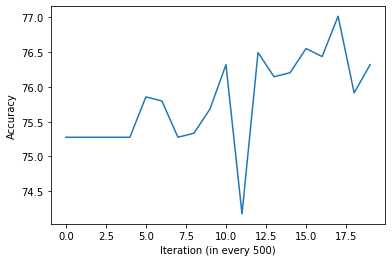

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 26  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.21   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.21
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.508173406124115. Accuracy: 75.27568195008706
Iteration: 1000. Loss: 0.5159710049629211. Accuracy: 75.27568195008706
Iteration: 1500. Loss: 0.5458744168281555. Accuracy: 75.27568195008706
Iteration: 2000. Loss: 0.47848284244537354. Accuracy: 75.27568195008706
Iteration: 2500. Loss: 0.5474092364311218. Accuracy: 75.27568195008706
Iteration: 3000. Loss: 0.5143582820892334. Accuracy: 75.27568195008706
Iteration: 3500. Loss: 0.4971095025539398. Accuracy: 75.97214161346488
Iteration: 4000. Loss: 0.5463634729385376. Accuracy: 75.85606500290191
Iteration: 4500. Loss: 0.5286129713058472. Accuracy: 74.75333720255368
Iteration: 5000. Loss: 0.5280531048774719. Accuracy: 75.79802669762043
Iteration: 5500. Loss: 0.5006760358810425. Accuracy: 76.14625652930934
Iteration: 6000. Loss: 0.4949426054954529. Accuracy: 75.56587347649449
Iteration: 6500. Loss: 0.5614134669303894. Accuracy: 76.26233313987231
Iteration: 7000. Loss: 0.5361087918281555. Accuracy: 75.56587347649449
Iterati

## Setup 25 Visualization

[0.508173406124115, 0.5159710049629211, 0.5458744168281555, 0.47848284244537354, 0.5474092364311218, 0.5143582820892334, 0.4971095025539398, 0.5463634729385376, 0.5286129713058472, 0.5280531048774719, 0.5006760358810425, 0.4949426054954529, 0.5614134669303894, 0.5361087918281555, 0.4967517852783203, 0.52683424949646, 0.534541130065918, 0.5252038836479187, 0.4777463674545288, 0.5005977153778076]


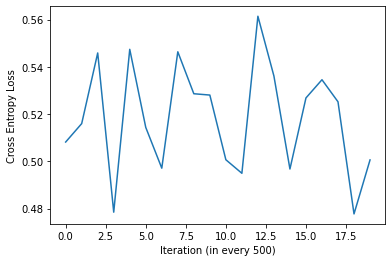

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 75.97214161346488, 75.85606500290191, 74.75333720255368, 75.79802669762043, 76.14625652930934, 75.56587347649449, 76.26233313987231, 75.56587347649449, 74.86941381311665, 75.97214161346488, 75.44979686593152, 74.75333720255368, 75.73998839233894, 76.26233313987231]


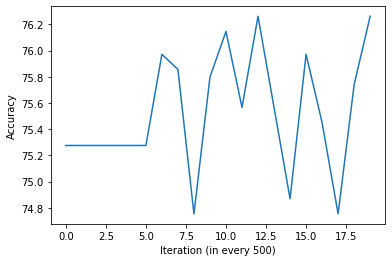

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 27  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.23   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.23
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5690115094184875. Accuracy: 75.27568195008706
Iteration: 1000. Loss: 0.5641127228736877. Accuracy: 75.27568195008706
Iteration: 1500. Loss: 0.5433947443962097. Accuracy: 74.75333720255368
Iteration: 2000. Loss: 0.5294538736343384. Accuracy: 75.97214161346488
Iteration: 2500. Loss: 0.548014760017395. Accuracy: 76.26233313987231
Iteration: 3000. Loss: 0.5274706482887268. Accuracy: 76.26233313987231
Iteration: 3500. Loss: 0.5488768815994263. Accuracy: 76.37840975043528
Iteration: 4000. Loss: 0.5582870841026306. Accuracy: 76.3203714451538
Iteration: 4500. Loss: 0.48601284623146057. Accuracy: 75.9141033081834
Iteration: 5000. Loss: 0.5308287739753723. Accuracy: 76.20429483459083
Iteration: 5500. Loss: 0.520488977432251. Accuracy: 75.1015670342426
Iteration: 6000. Loss: 0.6004198789596558. Accuracy: 72.95414973882762
Iteration: 6500. Loss: 0.5289875864982605. Accuracy: 76.3203714451538
Iteration: 7000. Loss: 0.523812472820282. Accuracy: 75.73998839233894
Iteration: 75

## Setup 26 Visualization

[0.5690115094184875, 0.5641127228736877, 0.5433947443962097, 0.5294538736343384, 0.548014760017395, 0.5274706482887268, 0.5488768815994263, 0.5582870841026306, 0.48601284623146057, 0.5308287739753723, 0.520488977432251, 0.6004198789596558, 0.5289875864982605, 0.523812472820282, 0.5275138020515442, 0.4709850251674652, 0.542287290096283, 0.45647570490837097, 0.521405816078186, 0.5001764297485352]


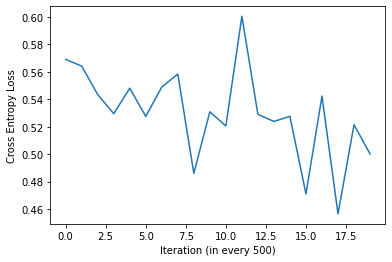

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.27568195008706, 75.27568195008706, 74.75333720255368, 75.97214161346488, 76.26233313987231, 76.26233313987231, 76.37840975043528, 76.3203714451538, 75.9141033081834, 76.20429483459083, 75.1015670342426, 72.95414973882762, 76.3203714451538, 75.73998839233894, 76.90075449796866, 75.9141033081834, 77.01683110853163, 75.68195008705746, 74.81137550783517, 76.84271619268718]


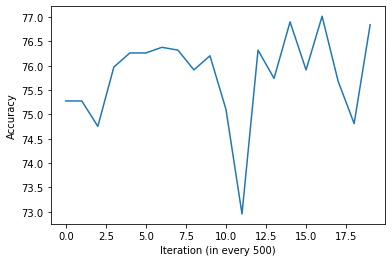

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 28  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 10000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.25   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 10000
learning_rate = 0.25
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.545555591583252. Accuracy: 75.27568195008706
Iteration: 1000. Loss: 0.4808169901371002. Accuracy: 75.27568195008706
Iteration: 1500. Loss: 0.5375447869300842. Accuracy: 75.27568195008706
Iteration: 2000. Loss: 0.5429085493087769. Accuracy: 75.27568195008706
Iteration: 2500. Loss: 0.5658618807792664. Accuracy: 75.27568195008706
Iteration: 3000. Loss: 0.598314642906189. Accuracy: 74.81137550783517
Iteration: 3500. Loss: 0.5594797134399414. Accuracy: 76.3203714451538
Iteration: 4000. Loss: 0.5532776713371277. Accuracy: 72.95414973882762
Iteration: 4500. Loss: 0.5536481738090515. Accuracy: 74.98549042367962
Iteration: 5000. Loss: 0.5526248216629028. Accuracy: 76.20429483459083
Iteration: 5500. Loss: 0.5109776258468628. Accuracy: 75.9141033081834
Iteration: 6000. Loss: 0.5293638110160828. Accuracy: 74.75333720255368
Iteration: 6500. Loss: 0.4797831177711487. Accuracy: 76.14625652930934
Iteration: 7000. Loss: 0.5238089561462402. Accuracy: 73.94080092861289
Iteration: 

## Setup 28 Visualization

[0.545555591583252, 0.4808169901371002, 0.5375447869300842, 0.5429085493087769, 0.5658618807792664, 0.598314642906189, 0.5594797134399414, 0.5532776713371277, 0.5536481738090515, 0.5526248216629028, 0.5109776258468628, 0.5293638110160828, 0.4797831177711487, 0.5238089561462402, 0.4538964629173279, 0.5493969321250916, 0.5756258964538574, 0.49988436698913574, 0.5269628763198853, 0.4982296824455261]


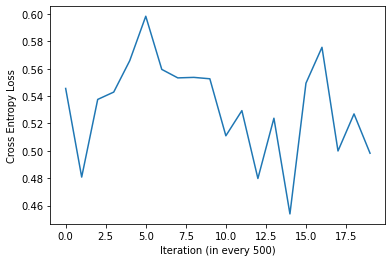

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 74.81137550783517, 76.3203714451538, 72.95414973882762, 74.98549042367962, 76.20429483459083, 75.9141033081834, 74.75333720255368, 76.14625652930934, 73.94080092861289, 74.92745211839814, 76.61056297156124, 75.27568195008706, 74.81137550783517, 75.73998839233894, 76.08821822402786]


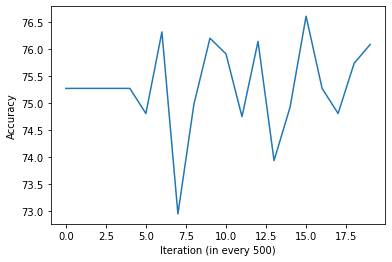

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 29  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 850  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 850
num_iters = 30000
learning_rate = 0.17
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5419094562530518. Accuracy: 75.27568195008706
Iteration: 1000. Loss: 0.5082513689994812. Accuracy: 75.27568195008706
Iteration: 1500. Loss: 0.5364068150520325. Accuracy: 75.27568195008706
Iteration: 2000. Loss: 0.4990825355052948. Accuracy: 75.27568195008706
Iteration: 2500. Loss: 0.5094220042228699. Accuracy: 75.27568195008706
Iteration: 3000. Loss: 0.5430450439453125. Accuracy: 75.68195008705746
Iteration: 3500. Loss: 0.5738305449485779. Accuracy: 75.04352872896112
Iteration: 4000. Loss: 0.54511559009552. Accuracy: 74.17295414973883
Iteration: 4500. Loss: 0.5073862671852112. Accuracy: 75.85606500290191
Iteration: 5000. Loss: 0.5022289752960205. Accuracy: 76.43644805571677
Iteration: 5500. Loss: 0.5236729383468628. Accuracy: 74.81137550783517
Iteration: 6000. Loss: 0.5194120407104492. Accuracy: 75.97214161346488
Iteration: 6500. Loss: 0.5906855463981628. Accuracy: 74.92745211839814
Iteration: 7000. Loss: 0.5201486349105835. Accuracy: 74.40510737086477
Iteration

## Setup 28 Visualization

[0.5419094562530518, 0.5082513689994812, 0.5364068150520325, 0.4990825355052948, 0.5094220042228699, 0.5430450439453125, 0.5738305449485779, 0.54511559009552, 0.5073862671852112, 0.5022289752960205, 0.5236729383468628, 0.5194120407104492, 0.5906855463981628, 0.5201486349105835, 0.5080521106719971, 0.5292086005210876, 0.5231019258499146, 0.4612310826778412, 0.51369309425354, 0.5040005445480347, 0.5087343454360962, 0.5184969305992126, 0.5295811295509338, 0.4936981201171875, 0.5030562281608582, 0.4902177155017853, 0.504260778427124, 0.5011354088783264, 0.5022349953651428, 0.48716530203819275, 0.5114126801490784, 0.48314815759658813, 0.47756731510162354, 0.4893067181110382, 0.5480865240097046, 0.4734139144420624, 0.4594305157661438, 0.5248547196388245, 0.47644320130348206, 0.463773250579834, 0.42787134647369385, 0.555645763874054, 0.4635469913482666, 0.5349661111831665, 0.46314412355422974, 0.5131557583808899, 0.46636801958084106, 0.5242622494697571, 0.4637569189071655, 0.4871799647808075,

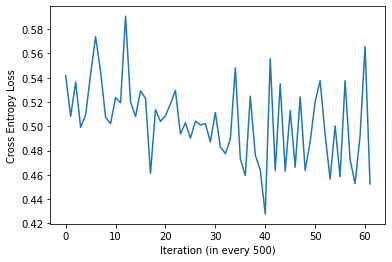

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 75.27568195008706, 75.68195008705746, 75.04352872896112, 74.17295414973883, 75.85606500290191, 76.43644805571677, 74.81137550783517, 75.97214161346488, 74.92745211839814, 74.40510737086477, 76.26233313987231, 75.62391178177597, 75.73998839233894, 75.68195008705746, 76.08821822402786, 76.08821822402786, 76.43644805571677, 75.85606500290191, 76.49448636099825, 75.9141033081834, 75.9141033081834, 76.08821822402786, 75.507835171213, 75.68195008705746, 76.43644805571677, 75.79802669762043, 75.68195008705746, 76.14625652930934, 77.01683110853163, 76.66860127684272, 75.97214161346488, 75.85606500290191, 76.7266395821242, 72.78003482298317, 75.56587347649449, 75.9141033081834, 76.3203714451538, 74.57922228670922, 75.85606500290191, 75.79802669762043, 76.08821822402786, 75.73998839233894, 76.43644805571677, 74.86941381311665, 76.26233313987231, 75.97214161346488, 75.73998839233894, 75.1015670342426, 76.14625652930934, 

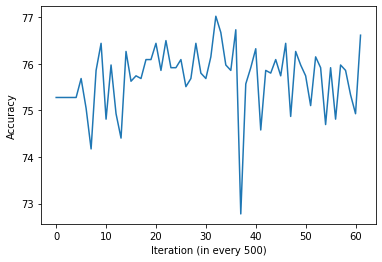

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 30  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 1500  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 1500
num_iters = 30000
learning_rate = 0.17
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5357370376586914. Accuracy: 74.85448195576251
Iteration: 1000. Loss: 0.5541083216667175. Accuracy: 74.85448195576251
Iteration: 1500. Loss: 0.5249131917953491. Accuracy: 74.85448195576251
Iteration: 2000. Loss: 0.5332158207893372. Accuracy: 74.38882421420256
Iteration: 2500. Loss: 0.5370036363601685. Accuracy: 75.61117578579744
Iteration: 3000. Loss: 0.5672684907913208. Accuracy: 75.43655413271246
Iteration: 3500. Loss: 0.5191784501075745. Accuracy: 74.85448195576251
Iteration: 4000. Loss: 0.523976743221283. Accuracy: 74.62165308498254
Iteration: 4500. Loss: 0.6045221090316772. Accuracy: 74.85448195576251
Iteration: 5000. Loss: 0.4961608350276947. Accuracy: 75.02910360884749
Iteration: 5500. Loss: 0.5241797566413879. Accuracy: 75.20372526193248
Iteration: 6000. Loss: 0.5002549886703491. Accuracy: 75.43655413271246
Iteration: 6500. Loss: 0.5153346061706543. Accuracy: 74.91268917345751
Iteration: 7000. Loss: 0.5046523809432983. Accuracy: 75.43655413271246
Iteratio

## Setup 30 Visualization

[0.5357370376586914, 0.5541083216667175, 0.5249131917953491, 0.5332158207893372, 0.5370036363601685, 0.5672684907913208, 0.5191784501075745, 0.523976743221283, 0.6045221090316772, 0.4961608350276947, 0.5241797566413879, 0.5002549886703491, 0.5153346061706543, 0.5046523809432983, 0.5222311019897461, 0.5166624188423157, 0.5052582025527954, 0.5040152668952942, 0.4912772476673126, 0.5110182166099548, 0.49019917845726013, 0.49679508805274963, 0.47824791073799133, 0.49736568331718445, 0.4776366055011749, 0.4754451513290405, 0.4817252457141876, 0.48632803559303284, 0.45689377188682556, 0.4605996608734131, 0.4866950213909149, 0.5076521039009094, 0.4408387243747711, 0.4815188944339752, 0.49687764048576355, 0.4785733222961426, 0.46978774666786194, 0.4782152771949768, 0.479515939950943, 0.4386008679866791, 0.47431281208992004, 0.5096938610076904, 0.48766234517097473, 0.45828405022621155, 0.49031805992126465, 0.4347327947616577, 0.4757792055606842, 0.4824802279472351, 0.44038069248199463, 0.428260

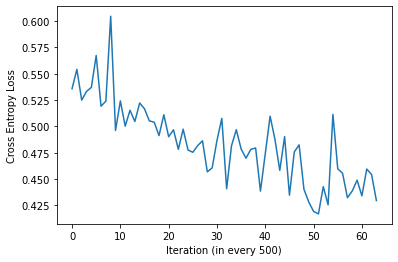

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.85448195576251, 74.85448195576251, 74.85448195576251, 74.38882421420256, 75.61117578579744, 75.43655413271246, 74.85448195576251, 74.62165308498254, 74.85448195576251, 75.02910360884749, 75.20372526193248, 75.43655413271246, 74.91268917345751, 75.43655413271246, 76.1350407450524, 74.27240977881257, 75.72759022118743, 75.26193247962748, 75.66938300349243, 73.9813736903376, 75.32013969732247, 75.55296856810244, 75.84400465657741, 76.42607683352736, 77.53201396973225, 76.48428405122235, 76.1350407450524, 76.19324796274738, 76.36786961583236, 75.26193247962748, 76.60069848661234, 73.45750873108265, 74.79627473806752, 76.48428405122235, 76.19324796274738, 76.36786961583236, 74.15599534342259, 75.20372526193248, 75.78579743888243, 75.37834691501746, 75.84400465657741, 74.79627473806752, 74.38882421420256, 75.90221187427241, 75.14551804423749, 75.14551804423749, 74.85448195576251, 75.90221187427241, 75.32013969732247, 76.0186263096624, 76.19324796274738, 75.84400465657741, 75.494761350407

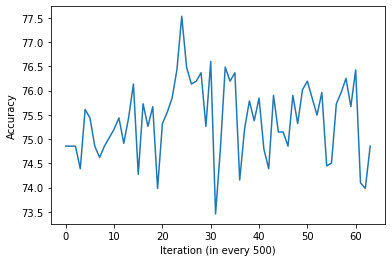

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 31  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 2000  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 2000
num_iters = 30000
learning_rate = 0.17
num_hidden = 24

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5400961637496948. Accuracy: 74.85448195576251
Iteration: 1000. Loss: 0.5336447954177856. Accuracy: 74.85448195576251
Iteration: 1500. Loss: 0.5273089408874512. Accuracy: 74.85448195576251
Iteration: 2000. Loss: 0.5242562294006348. Accuracy: 74.85448195576251
Iteration: 2500. Loss: 0.5080670118331909. Accuracy: 74.97089639115251
Iteration: 3000. Loss: 0.5542577505111694. Accuracy: 74.79627473806752
Iteration: 3500. Loss: 0.5175129175186157. Accuracy: 75.72759022118743
Iteration: 4000. Loss: 0.5313909649848938. Accuracy: 75.72759022118743
Iteration: 4500. Loss: 0.5326802730560303. Accuracy: 75.72759022118743
Iteration: 5000. Loss: 0.5386223793029785. Accuracy: 75.72759022118743
Iteration: 5500. Loss: 0.49568524956703186. Accuracy: 76.30966239813736
Iteration: 6000. Loss: 0.5174931287765503. Accuracy: 75.61117578579744
Iteration: 6500. Loss: 0.5328923463821411. Accuracy: 75.32013969732247
Iteration: 7000. Loss: 0.5228134989738464. Accuracy: 75.61117578579744
Iterat

## Setup 31 Visualization

[0.5400961637496948, 0.5336447954177856, 0.5273089408874512, 0.5242562294006348, 0.5080670118331909, 0.5542577505111694, 0.5175129175186157, 0.5313909649848938, 0.5326802730560303, 0.5386223793029785, 0.49568524956703186, 0.5174931287765503, 0.5328923463821411, 0.5228134989738464, 0.488672137260437, 0.5100665092468262, 0.5311578512191772, 0.5178171396255493, 0.49073898792266846, 0.4904962182044983, 0.5055638551712036, 0.5117189884185791, 0.4807456433773041, 0.48014765977859497, 0.5245423913002014, 0.4959428906440735, 0.508938193321228, 0.4732889235019684, 0.48716500401496887, 0.5096719264984131, 0.48689499497413635, 0.4686819612979889, 0.4906485080718994, 0.4792400598526001, 0.5094006061553955, 0.502993106842041, 0.4521138072013855, 0.4987509250640869, 0.4767838418483734, 0.47108224034309387, 0.45875072479248047, 0.478072851896286, 0.48848554491996765, 0.4559137225151062, 0.4460773169994354, 0.4761093556880951, 0.46696943044662476, 0.5101185441017151, 0.4941575527191162, 0.466911077499

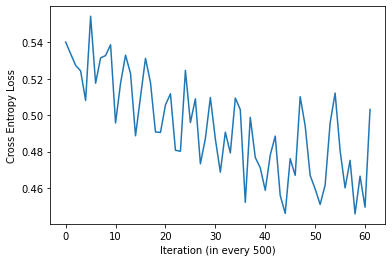

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 74.97089639115251, 74.79627473806752, 75.72759022118743, 75.72759022118743, 75.72759022118743, 75.72759022118743, 76.30966239813736, 75.61117578579744, 75.32013969732247, 75.61117578579744, 76.0186263096624, 75.90221187427241, 76.1350407450524, 75.90221187427241, 76.30966239813736, 76.0768335273574, 75.02910360884749, 75.32013969732247, 76.48428405122235, 76.0768335273574, 75.20372526193248, 76.19324796274738, 76.60069848661234, 76.65890570430733, 76.25145518044238, 76.19324796274738, 75.55296856810244, 75.49476135040744, 76.54249126891735, 76.65890570430733, 76.30966239813736, 76.30966239813736, 76.1350407450524, 74.09778812572759, 76.25145518044238, 77.35739231664726, 77.0081490104773, 76.30966239813736, 76.0186263096624, 76.89173457508731, 76.30966239813736, 76.48428405122235, 76.19324796274738, 77.29918509895226, 76.0186263096624, 76.94994179278231, 76.83352735739231, 75.61117578579744, 76.25145518044238, 

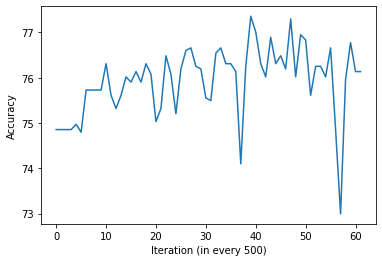

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 32  Neural Network with 34 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 34  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 34

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5483413338661194. Accuracy: 74.85448195576251
Iteration: 1000. Loss: 0.5641494989395142. Accuracy: 74.85448195576251
Iteration: 1500. Loss: 0.5715733170509338. Accuracy: 74.85448195576251
Iteration: 2000. Loss: 0.5035526752471924. Accuracy: 74.85448195576251
Iteration: 2500. Loss: 0.49259570240974426. Accuracy: 74.85448195576251
Iteration: 3000. Loss: 0.49832531809806824. Accuracy: 74.91268917345751
Iteration: 3500. Loss: 0.470047265291214. Accuracy: 74.85448195576251
Iteration: 4000. Loss: 0.45585882663726807. Accuracy: 75.32013969732247
Iteration: 4500. Loss: 0.5510135889053345. Accuracy: 75.32013969732247
Iteration: 5000. Loss: 0.5185115337371826. Accuracy: 75.72759022118743
Iteration: 5500. Loss: 0.47938475012779236. Accuracy: 75.43655413271246
Iteration: 6000. Loss: 0.5089887976646423. Accuracy: 75.96041909196741
Iteration: 6500. Loss: 0.43375444412231445. Accuracy: 74.85448195576251
Iteration: 7000. Loss: 0.5036527514457703. Accuracy: 75.66938300349243
Ite

## Setup 32 Visualization

[0.5483413338661194, 0.5641494989395142, 0.5715733170509338, 0.5035526752471924, 0.49259570240974426, 0.49832531809806824, 0.470047265291214, 0.45585882663726807, 0.5510135889053345, 0.5185115337371826, 0.47938475012779236, 0.5089887976646423, 0.43375444412231445, 0.5036527514457703, 0.5043832659721375, 0.480278879404068, 0.4990125596523285, 0.4946886897087097, 0.49617117643356323, 0.5467113852500916, 0.502921462059021, 0.5085769295692444, 0.47933632135391235, 0.442430704832077, 0.496529221534729, 0.4992273151874542, 0.46716251969337463, 0.5344794392585754, 0.5224635004997253, 0.524608314037323, 0.5061697363853455, 0.5613648295402527, 0.4445668160915375, 0.4797237813472748, 0.4462674856185913, 0.46395769715309143, 0.4703272879123688, 0.417206734418869, 0.44783249497413635, 0.5281010270118713, 0.43719935417175293, 0.5233343839645386, 0.45816174149513245, 0.46924611926078796, 0.4292678236961365, 0.4946174621582031, 0.46355074644088745, 0.49953219294548035, 0.40357717871665955, 0.49896457

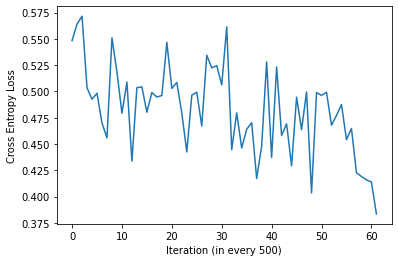

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 74.91268917345751, 74.85448195576251, 75.32013969732247, 75.32013969732247, 75.72759022118743, 75.43655413271246, 75.96041909196741, 74.85448195576251, 75.66938300349243, 76.0768335273574, 75.20372526193248, 75.84400465657741, 75.55296856810244, 76.54249126891735, 75.20372526193248, 74.50523864959256, 75.90221187427241, 75.55296856810244, 76.0186263096624, 76.42607683352736, 76.54249126891735, 75.32013969732247, 76.54249126891735, 76.60069848661234, 74.21420256111757, 75.61117578579744, 76.42607683352736, 73.34109429569267, 76.0768335273574, 75.96041909196741, 75.78579743888243, 75.32013969732247, 74.56344586728754, 72.9918509895227, 75.49476135040744, 75.26193247962748, 75.02910360884749, 75.37834691501746, 74.38882421420256, 74.09778812572759, 74.15599534342259, 76.42607683352736, 75.96041909196741, 76.1350407450524, 76.25145518044238, 75.37834691501746, 75.08731082654249, 74.9708963911525

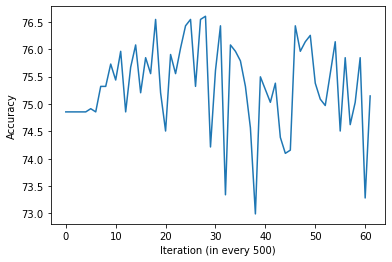

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 33  Neural Network with 44 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 44  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 44

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5341870188713074. Accuracy: 74.85448195576251
Iteration: 1000. Loss: 0.5130001902580261. Accuracy: 74.85448195576251
Iteration: 1500. Loss: 0.45899853110313416. Accuracy: 74.85448195576251
Iteration: 2000. Loss: 0.6011053323745728. Accuracy: 74.85448195576251
Iteration: 2500. Loss: 0.49184176325798035. Accuracy: 74.85448195576251
Iteration: 3000. Loss: 0.562626838684082. Accuracy: 74.79627473806752
Iteration: 3500. Loss: 0.4516318440437317. Accuracy: 75.14551804423749
Iteration: 4000. Loss: 0.4990754723548889. Accuracy: 75.08731082654249
Iteration: 4500. Loss: 0.5420554280281067. Accuracy: 75.43655413271246
Iteration: 5000. Loss: 0.4643923044204712. Accuracy: 75.90221187427241
Iteration: 5500. Loss: 0.5225709676742554. Accuracy: 74.62165308498254
Iteration: 6000. Loss: 0.5756039023399353. Accuracy: 74.85448195576251
Iteration: 6500. Loss: 0.5761467814445496. Accuracy: 76.25145518044238
Iteration: 7000. Loss: 0.5123392939567566. Accuracy: 72.9918509895227
Iterati

## Setup 33 Visualization

[0.5341870188713074, 0.5130001902580261, 0.45899853110313416, 0.6011053323745728, 0.49184176325798035, 0.562626838684082, 0.4516318440437317, 0.4990754723548889, 0.5420554280281067, 0.4643923044204712, 0.5225709676742554, 0.5756039023399353, 0.5761467814445496, 0.5123392939567566, 0.562591016292572, 0.5004554390907288, 0.4886745810508728, 0.4934029281139374, 0.5644111633300781, 0.5070480108261108, 0.4630497694015503, 0.47910070419311523, 0.4835203289985657, 0.4505341053009033, 0.5084385871887207, 0.47553542256355286, 0.5312663912773132, 0.4855813980102539, 0.4545075297355652, 0.5047956705093384, 0.5262004137039185, 0.48433980345726013, 0.5170959234237671, 0.4236985146999359, 0.45373034477233887, 0.47980642318725586, 0.45658013224601746, 0.5387799739837646, 0.5130100846290588, 0.48004400730133057, 0.45140326023101807, 0.3987453579902649, 0.40535491704940796, 0.44296160340309143, 0.4357188642024994, 0.4711567461490631, 0.40005165338516235, 0.4549775719642639, 0.38943126797676086, 0.38634

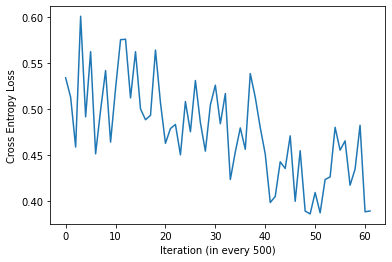

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 74.79627473806752, 75.14551804423749, 75.08731082654249, 75.43655413271246, 75.90221187427241, 74.62165308498254, 74.85448195576251, 76.25145518044238, 72.9918509895227, 75.08731082654249, 76.60069848661234, 76.54249126891735, 76.19324796274738, 75.72759022118743, 75.90221187427241, 75.49476135040744, 75.14551804423749, 75.32013969732247, 76.0768335273574, 75.14551804423749, 75.84400465657741, 75.90221187427241, 75.32013969732247, 76.0768335273574, 76.25145518044238, 76.42607683352736, 74.79627473806752, 75.32013969732247, 75.43655413271246, 75.72759022118743, 75.84400465657741, 76.83352735739231, 74.09778812572759, 74.56344586728754, 73.51571594877765, 76.0768335273574, 76.1350407450524, 75.96041909196741, 75.84400465657741, 77.12456344586728, 74.67986030267753, 76.25145518044238, 74.97089639115251, 75.26193247962748, 77.29918509895226, 75.96041909196741, 75.20372526193248, 75.5529685681024

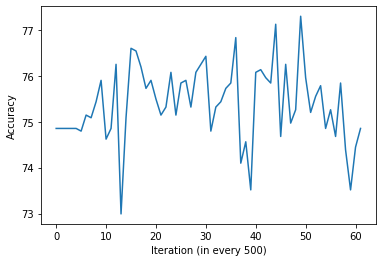

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 34  Neural Network with 54 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 54  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 54

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5365598797798157. Accuracy: 74.85448195576251
Iteration: 1000. Loss: 0.5772989392280579. Accuracy: 74.85448195576251
Iteration: 1500. Loss: 0.5533595681190491. Accuracy: 74.85448195576251
Iteration: 2000. Loss: 0.5771962404251099. Accuracy: 74.85448195576251
Iteration: 2500. Loss: 0.4968840777873993. Accuracy: 74.85448195576251
Iteration: 3000. Loss: 0.49674591422080994. Accuracy: 76.1350407450524
Iteration: 3500. Loss: 0.5425830483436584. Accuracy: 75.37834691501746
Iteration: 4000. Loss: 0.5598888993263245. Accuracy: 75.66938300349243
Iteration: 4500. Loss: 0.5340273976325989. Accuracy: 76.0768335273574
Iteration: 5000. Loss: 0.5521835684776306. Accuracy: 74.44703143189756
Iteration: 5500. Loss: 0.4724620580673218. Accuracy: 75.43655413271246
Iteration: 6000. Loss: 0.5488396286964417. Accuracy: 74.97089639115251
Iteration: 6500. Loss: 0.5125972032546997. Accuracy: 76.0768335273574
Iteration: 7000. Loss: 0.45829442143440247. Accuracy: 75.61117578579744
Iteratio

## Setup 34 Visualization

[0.5341870188713074, 0.5130001902580261, 0.45899853110313416, 0.6011053323745728, 0.49184176325798035, 0.562626838684082, 0.4516318440437317, 0.4990754723548889, 0.5420554280281067, 0.4643923044204712, 0.5225709676742554, 0.5756039023399353, 0.5761467814445496, 0.5123392939567566, 0.562591016292572, 0.5004554390907288, 0.4886745810508728, 0.4934029281139374, 0.5644111633300781, 0.5070480108261108, 0.4630497694015503, 0.47910070419311523, 0.4835203289985657, 0.4505341053009033, 0.5084385871887207, 0.47553542256355286, 0.5312663912773132, 0.4855813980102539, 0.4545075297355652, 0.5047956705093384, 0.5262004137039185, 0.48433980345726013, 0.5170959234237671, 0.4236985146999359, 0.45373034477233887, 0.47980642318725586, 0.45658013224601746, 0.5387799739837646, 0.5130100846290588, 0.48004400730133057, 0.45140326023101807, 0.3987453579902649, 0.40535491704940796, 0.44296160340309143, 0.4357188642024994, 0.4711567461490631, 0.40005165338516235, 0.4549775719642639, 0.38943126797676086, 0.38634

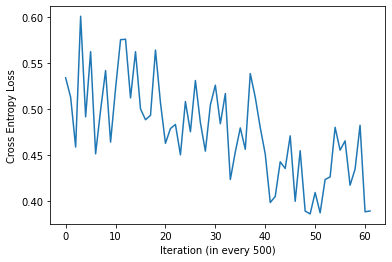

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 74.79627473806752, 75.14551804423749, 75.08731082654249, 75.43655413271246, 75.90221187427241, 74.62165308498254, 74.85448195576251, 76.25145518044238, 72.9918509895227, 75.08731082654249, 76.60069848661234, 76.54249126891735, 76.19324796274738, 75.72759022118743, 75.90221187427241, 75.49476135040744, 75.14551804423749, 75.32013969732247, 76.0768335273574, 75.14551804423749, 75.84400465657741, 75.90221187427241, 75.32013969732247, 76.0768335273574, 76.25145518044238, 76.42607683352736, 74.79627473806752, 75.32013969732247, 75.43655413271246, 75.72759022118743, 75.84400465657741, 76.83352735739231, 74.09778812572759, 74.56344586728754, 73.51571594877765, 76.0768335273574, 76.1350407450524, 75.96041909196741, 75.84400465657741, 77.12456344586728, 74.67986030267753, 76.25145518044238, 74.97089639115251, 75.26193247962748, 77.29918509895226, 75.96041909196741, 75.20372526193248, 75.5529685681024

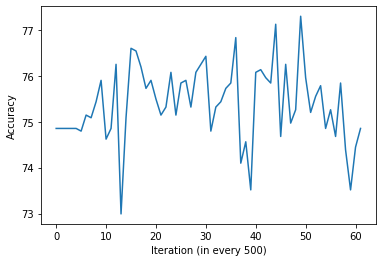

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 35  Neural Network with 64 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 64  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 64

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5701394081115723. Accuracy: 74.85448195576251
Iteration: 1000. Loss: 0.5437477231025696. Accuracy: 74.85448195576251
Iteration: 1500. Loss: 0.5677730441093445. Accuracy: 74.85448195576251
Iteration: 2000. Loss: 0.4990672767162323. Accuracy: 74.85448195576251
Iteration: 2500. Loss: 0.4988817274570465. Accuracy: 74.85448195576251
Iteration: 3000. Loss: 0.51181960105896. Accuracy: 75.08731082654249
Iteration: 3500. Loss: 0.47778186202049255. Accuracy: 75.32013969732247
Iteration: 4000. Loss: 0.536518931388855. Accuracy: 75.84400465657741
Iteration: 4500. Loss: 0.5063547492027283. Accuracy: 75.26193247962748
Iteration: 5000. Loss: 0.504192590713501. Accuracy: 74.97089639115251
Iteration: 5500. Loss: 0.5169333815574646. Accuracy: 75.78579743888243
Iteration: 6000. Loss: 0.4872729480266571. Accuracy: 75.14551804423749
Iteration: 6500. Loss: 0.5217345952987671. Accuracy: 75.96041909196741
Iteration: 7000. Loss: 0.5235698223114014. Accuracy: 71.42025611175785
Iteration:

## Setup 35 Visualization

[0.5701394081115723, 0.5437477231025696, 0.5677730441093445, 0.4990672767162323, 0.4988817274570465, 0.51181960105896, 0.47778186202049255, 0.536518931388855, 0.5063547492027283, 0.504192590713501, 0.5169333815574646, 0.4872729480266571, 0.5217345952987671, 0.5235698223114014, 0.5433224439620972, 0.5060701966285706, 0.4782152771949768, 0.5350390672683716, 0.4594142436981201, 0.44043996930122375, 0.5449910759925842, 0.4547831118106842, 0.47041741013526917, 0.4833701252937317, 0.5070156455039978, 0.578453779220581, 0.5485022664070129, 0.4441421926021576, 0.4584561288356781, 0.49380797147750854, 0.4789794087409973, 0.44809064269065857, 0.503934383392334, 0.4295654296875, 0.47043880820274353, 0.441927433013916, 0.44421958923339844, 0.41405248641967773, 0.5655913949012756, 0.3998588025569916, 0.3986143469810486, 0.5121928453445435, 0.42978692054748535, 0.42856839299201965, 0.5001996159553528, 0.36092737317085266, 0.40654563903808594, 0.47522300481796265, 0.478803426027298, 0.380922973155975

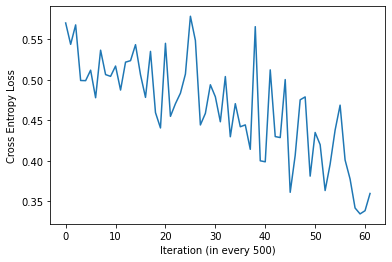

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 75.08731082654249, 75.32013969732247, 75.84400465657741, 75.26193247962748, 74.97089639115251, 75.78579743888243, 75.14551804423749, 75.96041909196741, 71.42025611175785, 75.55296856810244, 75.14551804423749, 75.26193247962748, 74.62165308498254, 75.72759022118743, 74.27240977881257, 72.29336437718277, 75.08731082654249, 76.0186263096624, 75.49476135040744, 75.49476135040744, 71.82770663562282, 74.62165308498254, 75.08731082654249, 76.0768335273574, 75.78579743888243, 74.21420256111757, 76.60069848661234, 74.62165308498254, 74.73806752037252, 75.02910360884749, 76.0768335273574, 75.32013969732247, 75.32013969732247, 73.22467986030267, 74.73806752037252, 73.51571594877765, 75.14551804423749, 75.20372526193248, 74.85448195576251, 73.74854481955762, 74.56344586728754, 75.61117578579744, 71.88591385331782, 72.87543655413272, 74.67986030267753, 76.25145518044238, 71.18742724097788, 75.02910360884

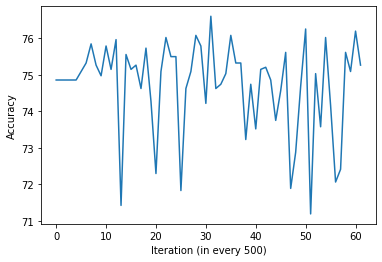

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 36  Neural Network with 74 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 74  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 74

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.54921954870224. Accuracy: 74.85448195576251
Iteration: 1000. Loss: 0.5178692936897278. Accuracy: 74.85448195576251
Iteration: 1500. Loss: 0.5406007170677185. Accuracy: 74.85448195576251
Iteration: 2000. Loss: 0.48278751969337463. Accuracy: 74.85448195576251
Iteration: 2500. Loss: 0.5051177740097046. Accuracy: 75.08731082654249
Iteration: 3000. Loss: 0.5245077610015869. Accuracy: 74.85448195576251
Iteration: 3500. Loss: 0.5012350678443909. Accuracy: 75.49476135040744
Iteration: 4000. Loss: 0.5259481072425842. Accuracy: 74.85448195576251
Iteration: 4500. Loss: 0.5202236175537109. Accuracy: 74.85448195576251
Iteration: 5000. Loss: 0.49363982677459717. Accuracy: 75.49476135040744
Iteration: 5500. Loss: 0.5003237128257751. Accuracy: 75.14551804423749
Iteration: 6000. Loss: 0.5765078067779541. Accuracy: 75.08731082654249
Iteration: 6500. Loss: 0.6254634857177734. Accuracy: 74.03958090803259
Iteration: 7000. Loss: 0.5193801522254944. Accuracy: 75.49476135040744
Iterati

## Setup 36 Visualization

[0.54921954870224, 0.5178692936897278, 0.5406007170677185, 0.48278751969337463, 0.5051177740097046, 0.5245077610015869, 0.5012350678443909, 0.5259481072425842, 0.5202236175537109, 0.49363982677459717, 0.5003237128257751, 0.5765078067779541, 0.6254634857177734, 0.5193801522254944, 0.45936599373817444, 0.47788459062576294, 0.47774189710617065, 0.5122624039649963, 0.5199710726737976, 0.5540961623191833, 0.5042031407356262, 0.47975030541419983, 0.49764305353164673, 0.5272140502929688, 0.496084600687027, 0.47423046827316284, 0.44089582562446594, 0.38210734724998474, 0.37416619062423706, 0.4577729403972626, 0.4146967828273773, 0.43563416600227356, 0.43015342950820923, 0.43000397086143494, 0.4086885452270508, 0.4399930536746979, 0.43417155742645264, 0.3512130379676819, 0.392276793718338, 0.5843093991279602, 0.40094754099845886, 0.3774765431880951, 0.32518622279167175, 0.40084025263786316, 0.43278175592422485, 0.3829749822616577, 0.5065472722053528, 0.39701950550079346, 0.5045753717422485, 0.3

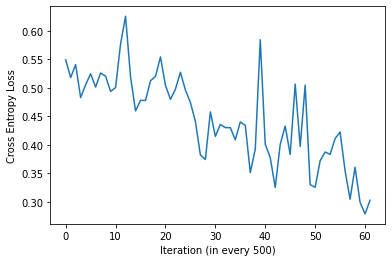

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.85448195576251, 74.85448195576251, 74.85448195576251, 74.85448195576251, 75.08731082654249, 74.85448195576251, 75.49476135040744, 74.85448195576251, 74.85448195576251, 75.49476135040744, 75.14551804423749, 75.08731082654249, 74.03958090803259, 75.49476135040744, 75.61117578579744, 74.27240977881257, 75.49476135040744, 75.08731082654249, 75.78579743888243, 72.40977881257275, 73.9231664726426, 75.37834691501746, 75.55296856810244, 74.44703143189756, 75.78579743888243, 75.61117578579744, 74.21420256111757, 75.66938300349243, 75.20372526193248, 73.45750873108265, 74.15599534342259, 75.55296856810244, 73.9231664726426, 75.14551804423749, 74.09778812572759, 75.26193247962748, 74.73806752037252, 75.26193247962748, 75.32013969732247, 72.17694994179278, 74.09778812572759, 74.97089639115251, 75.78579743888243, 75.14551804423749, 75.61117578579744, 75.02910360884749, 75.96041909196741, 76.1350407450524, 69.84866123399301, 74.67986030267753, 73.74854481955762, 76.30966239813736, 72.87543655413

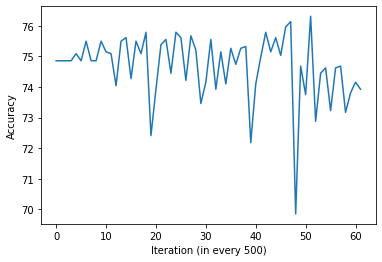

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 37  Neural Network with 94 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 94  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 94

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.6024037003517151. Accuracy: 74.85448195576251
Iteration: 1000. Loss: 0.5237178206443787. Accuracy: 74.85448195576251
Iteration: 1500. Loss: 0.5971938967704773. Accuracy: 75.26193247962748
Iteration: 2000. Loss: 0.4892416298389435. Accuracy: 75.08731082654249
Iteration: 2500. Loss: 0.5624470114707947. Accuracy: 75.43655413271246
Iteration: 3000. Loss: 0.5151282548904419. Accuracy: 75.43655413271246
Iteration: 3500. Loss: 0.5648835301399231. Accuracy: 75.90221187427241
Iteration: 4000. Loss: 0.5208563804626465. Accuracy: 75.66938300349243
Iteration: 4500. Loss: 0.5097712278366089. Accuracy: 75.66938300349243
Iteration: 5000. Loss: 0.5807309150695801. Accuracy: 76.19324796274738
Iteration: 5500. Loss: 0.517024040222168. Accuracy: 76.54249126891735
Iteration: 6000. Loss: 0.4688068628311157. Accuracy: 76.19324796274738
Iteration: 6500. Loss: 0.5132303237915039. Accuracy: 74.21420256111757
Iteration: 7000. Loss: 0.4496156871318817. Accuracy: 75.26193247962748
Iteratio

## Setup 37 Visualization

[0.6024037003517151, 0.5237178206443787, 0.5971938967704773, 0.4892416298389435, 0.5624470114707947, 0.5151282548904419, 0.5648835301399231, 0.5208563804626465, 0.5097712278366089, 0.5807309150695801, 0.517024040222168, 0.4688068628311157, 0.5132303237915039, 0.4496156871318817, 0.5494793653488159, 0.5465711951255798, 0.5630507469177246, 0.5008846521377563, 0.4684353172779083, 0.5075942277908325, 0.4681129455566406, 0.5540325045585632, 0.47933924198150635, 0.5017985105514526, 0.4965587854385376, 0.4518909156322479, 0.43334612250328064, 0.4603848159313202, 0.5323585271835327, 0.46735334396362305, 0.5041084289550781, 0.4396027624607086, 0.4139830470085144, 0.3893269896507263, 0.3975886106491089, 0.48354947566986084, 0.4437389373779297, 0.367595911026001, 0.4250008165836334, 0.4026031792163849, 0.3886100649833679, 0.4505138695240021, 0.3814523220062256, 0.4148896038532257, 0.480690062046051, 0.4169490933418274, 0.38361087441444397, 0.3442835807800293, 0.3551557660102844, 0.522210597991943

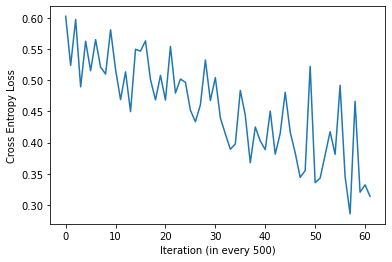

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.85448195576251, 74.85448195576251, 75.26193247962748, 75.08731082654249, 75.43655413271246, 75.43655413271246, 75.90221187427241, 75.66938300349243, 75.66938300349243, 76.19324796274738, 76.54249126891735, 76.19324796274738, 74.21420256111757, 75.26193247962748, 75.14551804423749, 75.55296856810244, 75.84400465657741, 74.03958090803259, 76.1350407450524, 76.0186263096624, 75.66938300349243, 74.91268917345751, 77.0663562281723, 76.36786961583236, 75.20372526193248, 76.48428405122235, 76.1350407450524, 75.49476135040744, 76.1350407450524, 71.53667054714785, 72.17694994179278, 74.27240977881257, 75.26193247962748, 75.72759022118743, 75.72759022118743, 75.61117578579744, 74.33061699650757, 74.33061699650757, 76.30966239813736, 77.0663562281723, 74.27240977881257, 75.02910360884749, 75.49476135040744, 75.96041909196741, 75.90221187427241, 75.43655413271246, 75.08731082654249, 76.30966239813736, 74.03958090803259, 74.15599534342259, 75.32013969732247, 73.69033760186264, 74.91268917345751

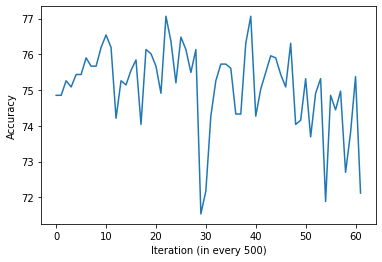

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 38  Neural Network with 26 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 26  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 26

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5748972296714783. Accuracy: 75.43453070683661
Iteration: 1000. Loss: 0.4704345464706421. Accuracy: 75.43453070683661
Iteration: 1500. Loss: 0.5271027088165283. Accuracy: 75.43453070683661
Iteration: 2000. Loss: 0.5467478632926941. Accuracy: 75.43453070683661
Iteration: 2500. Loss: 0.5072351098060608. Accuracy: 75.43453070683661
Iteration: 3000. Loss: 0.5477163195610046. Accuracy: 75.20278099652376
Iteration: 3500. Loss: 0.5161527991294861. Accuracy: 75.43453070683661
Iteration: 4000. Loss: 0.5159185528755188. Accuracy: 75.72421784472769
Iteration: 4500. Loss: 0.5082614421844482. Accuracy: 75.31865585168019
Iteration: 5000. Loss: 0.5402571558952332. Accuracy: 75.60834298957127
Iteration: 5500. Loss: 0.5199493169784546. Accuracy: 75.20278099652376
Iteration: 6000. Loss: 0.5431390404701233. Accuracy: 75.84009269988412
Iteration: 6500. Loss: 0.45954403281211853. Accuracy: 75.60834298957127
Iteration: 7000. Loss: 0.49187445640563965. Accuracy: 75.49246813441484
Itera

## Setup 38 Visualization

[0.5748972296714783, 0.4704345464706421, 0.5271027088165283, 0.5467478632926941, 0.5072351098060608, 0.5477163195610046, 0.5161527991294861, 0.5159185528755188, 0.5082614421844482, 0.5402571558952332, 0.5199493169784546, 0.5431390404701233, 0.45954403281211853, 0.49187445640563965, 0.4927607774734497, 0.4960010051727295, 0.5020465850830078, 0.5667811632156372, 0.5093019604682922, 0.48070165514945984, 0.46256113052368164, 0.46947288513183594, 0.5066269636154175, 0.4749079644680023, 0.5173665881156921, 0.4524023234844208, 0.49945777654647827, 0.5055802464485168, 0.5081027150154114, 0.47830867767333984, 0.5242807865142822, 0.504227340221405, 0.5253313779830933, 0.5055590271949768, 0.48367854952812195, 0.46029767394065857, 0.4876021146774292, 0.5107355713844299, 0.4835301637649536, 0.5097264647483826, 0.4961400330066681, 0.5281389951705933, 0.46798697113990784, 0.48920556902885437, 0.5022116303443909, 0.4635339081287384, 0.4592476785182953, 0.44550198316574097, 0.51777184009552, 0.43354123

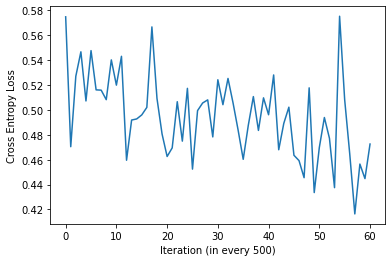

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.43453070683661, 75.43453070683661, 75.43453070683661, 75.43453070683661, 75.43453070683661, 75.20278099652376, 75.43453070683661, 75.72421784472769, 75.31865585168019, 75.60834298957127, 75.20278099652376, 75.84009269988412, 75.60834298957127, 75.49246813441484, 75.78215527230591, 75.55040556199305, 75.49246813441484, 76.071842410197, 76.071842410197, 75.78215527230591, 75.3765932792584, 76.41946697566628, 75.89803012746233, 76.41946697566628, 76.1297798377752, 75.78215527230591, 76.24565469293164, 75.60834298957127, 74.73928157589803, 75.78215527230591, 75.49246813441484, 76.1297798377752, 72.71147161066048, 76.41946697566628, 73.46465816917728, 75.66628041714948, 76.24565469293164, 76.30359212050985, 76.01390498261877, 76.18771726535341, 76.071842410197, 75.55040556199305, 76.47740440324449, 76.1297798377752, 76.1297798377752, 75.89803012746233, 75.49246813441484, 74.04403244495944, 75.3765932792584, 76.36152954808807, 75.60834298957127, 74.27578215527231, 74.27578215527231, 75.3

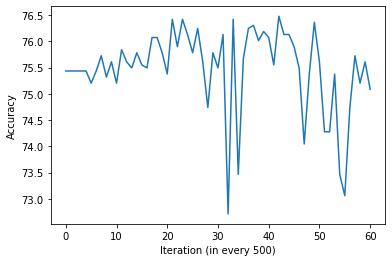

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 39  Neural Network with 29 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 29  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 29

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5324817299842834. Accuracy: 75.43453070683661
Iteration: 1000. Loss: 0.5695639252662659. Accuracy: 75.43453070683661
Iteration: 1500. Loss: 0.47736382484436035. Accuracy: 75.43453070683661
Iteration: 2000. Loss: 0.5252154469490051. Accuracy: 75.43453070683661
Iteration: 2500. Loss: 0.5373649001121521. Accuracy: 75.3765932792584
Iteration: 3000. Loss: 0.5809406042098999. Accuracy: 73.63847045191193
Iteration: 3500. Loss: 0.5279157757759094. Accuracy: 75.43453070683661
Iteration: 4000. Loss: 0.554565966129303. Accuracy: 75.78215527230591
Iteration: 4500. Loss: 0.4984159767627716. Accuracy: 75.26071842410197
Iteration: 5000. Loss: 0.49938106536865234. Accuracy: 75.84009269988412
Iteration: 5500. Loss: 0.512079119682312. Accuracy: 75.26071842410197
Iteration: 6000. Loss: 0.5686666965484619. Accuracy: 74.10196987253767
Iteration: 6500. Loss: 0.5137134194374084. Accuracy: 75.78215527230591
Iteration: 7000. Loss: 0.4868094027042389. Accuracy: 75.43453070683661
Iteratio

## Setup 39 Visualization

[0.5324817299842834, 0.5695639252662659, 0.47736382484436035, 0.5252154469490051, 0.5373649001121521, 0.5809406042098999, 0.5279157757759094, 0.554565966129303, 0.4984159767627716, 0.49938106536865234, 0.512079119682312, 0.5686666965484619, 0.5137134194374084, 0.4868094027042389, 0.46918660402297974, 0.539625883102417, 0.5129218101501465, 0.46587470173835754, 0.47634997963905334, 0.507573664188385, 0.4966271221637726, 0.5382235050201416, 0.5007143020629883, 0.4946865439414978, 0.479796439409256, 0.4593712091445923, 0.5069511532783508, 0.5147430896759033, 0.494640588760376, 0.4757569432258606, 0.458143413066864, 0.44425877928733826, 0.4921652376651764, 0.479429692029953, 0.42859289050102234, 0.48841628432273865, 0.4106620252132416, 0.5049396753311157, 0.48820385336875916, 0.4159073829650879, 0.41009485721588135, 0.48718929290771484, 0.42053717374801636, 0.4649481475353241, 0.43411725759506226, 0.5231902599334717, 0.45505964756011963, 0.5071064829826355, 0.4585705101490021, 0.45777553319

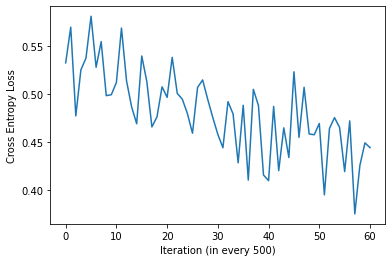

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.43453070683661, 75.43453070683661, 75.43453070683661, 75.43453070683661, 75.3765932792584, 73.63847045191193, 75.43453070683661, 75.78215527230591, 75.26071842410197, 75.84009269988412, 75.26071842410197, 74.10196987253767, 75.78215527230591, 75.43453070683661, 74.39165701042873, 76.18771726535341, 76.30359212050985, 75.02896871378911, 75.43453070683661, 75.31865585168019, 74.79721900347624, 75.26071842410197, 75.20278099652376, 75.66628041714948, 76.1297798377752, 75.72421784472769, 75.55040556199305, 76.071842410197, 75.66628041714948, 75.08690614136732, 75.78215527230591, 76.36152954808807, 75.84009269988412, 75.78215527230591, 76.071842410197, 75.31865585168019, 75.95596755504056, 76.41946697566628, 75.84009269988412, 76.59327925840093, 76.01390498261877, 75.20278099652376, 76.76709154113557, 76.01390498261877, 75.31865585168019, 76.47740440324449, 76.36152954808807, 74.27578215527231, 75.89803012746233, 75.60834298957127, 76.1297798377752, 74.39165701042873, 75.78215527230591,

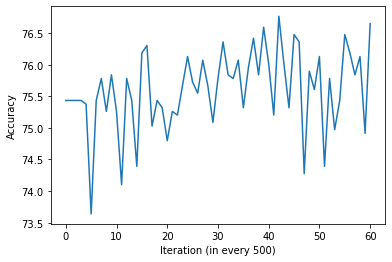

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 40  Neural Network with 32 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 32  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 32

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5114511847496033. Accuracy: 75.43453070683661
Iteration: 1000. Loss: 0.5613856315612793. Accuracy: 75.43453070683661
Iteration: 1500. Loss: 0.5514602065086365. Accuracy: 75.43453070683661
Iteration: 2000. Loss: 0.4959862530231476. Accuracy: 75.43453070683661
Iteration: 2500. Loss: 0.5054517984390259. Accuracy: 75.55040556199305
Iteration: 3000. Loss: 0.5193689465522766. Accuracy: 75.60834298957127
Iteration: 3500. Loss: 0.5379689931869507. Accuracy: 74.6234067207416
Iteration: 4000. Loss: 0.5132233500480652. Accuracy: 76.47740440324449
Iteration: 4500. Loss: 0.5194295644760132. Accuracy: 75.31865585168019
Iteration: 5000. Loss: 0.4782973825931549. Accuracy: 75.78215527230591
Iteration: 5500. Loss: 0.5227231383323669. Accuracy: 75.43453070683661
Iteration: 6000. Loss: 0.5226426720619202. Accuracy: 75.31865585168019
Iteration: 6500. Loss: 0.5209411382675171. Accuracy: 76.01390498261877
Iteration: 7000. Loss: 0.4283633232116699. Accuracy: 75.60834298957127
Iteratio

## Setup 40 Visualization

[0.5114511847496033, 0.5613856315612793, 0.5514602065086365, 0.4959862530231476, 0.5054517984390259, 0.5193689465522766, 0.5379689931869507, 0.5132233500480652, 0.5194295644760132, 0.4782973825931549, 0.5227231383323669, 0.5226426720619202, 0.5209411382675171, 0.4283633232116699, 0.48141276836395264, 0.5313110947608948, 0.5024394989013672, 0.4831126928329468, 0.47523993253707886, 0.4682946503162384, 0.4693986475467682, 0.5421901345252991, 0.5165495872497559, 0.45226386189460754, 0.5532437562942505, 0.46123048663139343, 0.5329660773277283, 0.5047630071640015, 0.5324317812919617, 0.5492045283317566, 0.49892914295196533, 0.5060616731643677, 0.5154314637184143, 0.45270976424217224, 0.47282207012176514, 0.5205175280570984, 0.5326099991798401, 0.5006510019302368, 0.4510459899902344, 0.45691967010498047, 0.4448745846748352, 0.48240432143211365, 0.4441249668598175, 0.523322343826294, 0.42998746037483215, 0.4675136208534241, 0.4761675000190735, 0.5034425854682922, 0.47849586606025696, 0.4843874

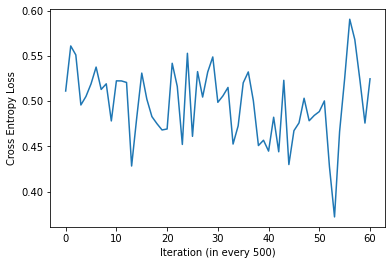

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.43453070683661, 75.43453070683661, 75.43453070683661, 75.43453070683661, 75.55040556199305, 75.60834298957127, 74.6234067207416, 76.47740440324449, 75.31865585168019, 75.78215527230591, 75.43453070683661, 75.31865585168019, 76.01390498261877, 75.60834298957127, 75.66628041714948, 75.89803012746233, 76.24565469293164, 76.01390498261877, 75.49246813441484, 75.95596755504056, 75.66628041714948, 74.73928157589803, 74.50753186558516, 76.30359212050985, 74.85515643105447, 75.72421784472769, 75.20278099652376, 75.02896871378911, 74.27578215527231, 75.08690614136732, 75.08690614136732, 75.66628041714948, 76.01390498261877, 75.31865585168019, 75.89803012746233, 75.84009269988412, 74.10196987253767, 75.26071842410197, 75.72421784472769, 74.97103128621089, 75.31865585168019, 75.49246813441484, 76.41946697566628, 74.73928157589803, 75.08690614136732, 74.56546929316339, 75.84009269988412, 75.78215527230591, 75.60834298957127, 75.55040556199305, 74.97103128621089, 76.1297798377752, 76.5932792584

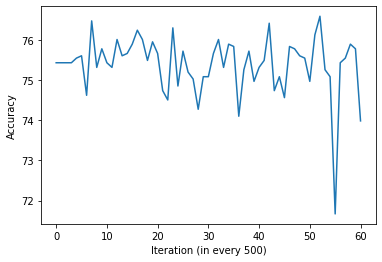

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 41  Neural Network with 19 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 19  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 19

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.5195454359054565. Accuracy: 75.43453070683661
Iteration: 1000. Loss: 0.5040556788444519. Accuracy: 75.43453070683661
Iteration: 1500. Loss: 0.5751579403877258. Accuracy: 74.44959443800695
Iteration: 2000. Loss: 0.532420814037323. Accuracy: 75.26071842410197
Iteration: 2500. Loss: 0.5448734164237976. Accuracy: 75.31865585168019
Iteration: 3000. Loss: 0.5135164260864258. Accuracy: 75.26071842410197
Iteration: 3500. Loss: 0.5163737535476685. Accuracy: 75.31865585168019
Iteration: 4000. Loss: 0.4749395549297333. Accuracy: 75.43453070683661
Iteration: 4500. Loss: 0.5287725925445557. Accuracy: 75.49246813441484
Iteration: 5000. Loss: 0.5451249480247498. Accuracy: 75.55040556199305
Iteration: 5500. Loss: 0.60051429271698. Accuracy: 75.20278099652376
Iteration: 6000. Loss: 0.5442939400672913. Accuracy: 75.31865585168019
Iteration: 6500. Loss: 0.5098272562026978. Accuracy: 75.3765932792584
Iteration: 7000. Loss: 0.5513433218002319. Accuracy: 75.95596755504056
Iteration: 

## Setup 41 Visualization

[0.5195454359054565, 0.5040556788444519, 0.5751579403877258, 0.532420814037323, 0.5448734164237976, 0.5135164260864258, 0.5163737535476685, 0.4749395549297333, 0.5287725925445557, 0.5451249480247498, 0.60051429271698, 0.5442939400672913, 0.5098272562026978, 0.5513433218002319, 0.5069320201873779, 0.5367851257324219, 0.5202499032020569, 0.4857611358165741, 0.5236933827400208, 0.5372229218482971, 0.5105215907096863, 0.5346834063529968, 0.5152536034584045, 0.4970824420452118, 0.49284738302230835, 0.5207204818725586, 0.5230942368507385, 0.5006227493286133, 0.48917263746261597, 0.5318183302879333, 0.4669693112373352, 0.530640721321106, 0.44126901030540466, 0.44087210297584534, 0.485049307346344, 0.46143943071365356, 0.49514251947402954, 0.5153566002845764, 0.4503536820411682, 0.466561496257782, 0.5747879147529602, 0.42419126629829407, 0.48986226320266724, 0.45693209767341614, 0.49878647923469543, 0.46441224217414856, 0.47997286915779114, 0.5073116421699524, 0.44381824135780334, 0.4759656786

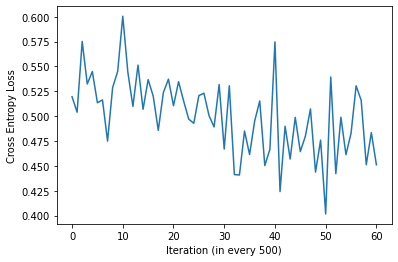

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.43453070683661, 75.43453070683661, 74.44959443800695, 75.26071842410197, 75.31865585168019, 75.26071842410197, 75.31865585168019, 75.43453070683661, 75.49246813441484, 75.55040556199305, 75.20278099652376, 75.31865585168019, 75.3765932792584, 75.95596755504056, 75.78215527230591, 75.14484356894553, 75.66628041714948, 76.18771726535341, 76.01390498261877, 74.10196987253767, 75.31865585168019, 74.15990730011588, 76.18771726535341, 76.18771726535341, 75.89803012746233, 76.59327925840093, 75.95596755504056, 75.78215527230591, 75.84009269988412, 76.70915411355736, 76.18771726535341, 74.15990730011588, 75.95596755504056, 76.41946697566628, 76.30359212050985, 76.01390498261877, 75.66628041714948, 76.24565469293164, 76.59327925840093, 76.01390498261877, 75.89803012746233, 75.08690614136732, 76.01390498261877, 74.21784472769409, 76.47740440324449, 75.72421784472769, 76.41946697566628, 76.36152954808807, 76.41946697566628, 75.26071842410197, 76.41946697566628, 76.01390498261877, 77.056778679

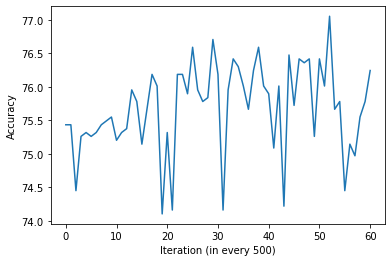

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Setup 42  Neural Network with 22 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 30000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 22  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 30000
learning_rate = 0.17
num_hidden = 22

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.46569138765335083. Accuracy: 74.11696583671106
Iteration: 1000. Loss: 0.5504099130630493. Accuracy: 74.11696583671106
Iteration: 1500. Loss: 0.5297611951828003. Accuracy: 74.11696583671106
Iteration: 2000. Loss: 0.593514084815979. Accuracy: 74.11696583671106
Iteration: 2500. Loss: 0.5144273638725281. Accuracy: 74.11696583671106
Iteration: 3000. Loss: 0.4901154041290283. Accuracy: 74.11696583671106
Iteration: 3500. Loss: 0.5273404717445374. Accuracy: 74.81181239143022
Iteration: 4000. Loss: 0.5290915966033936. Accuracy: 74.52229299363057
Iteration: 4500. Loss: 0.5070747137069702. Accuracy: 74.11696583671106
Iteration: 5000. Loss: 0.48904743790626526. Accuracy: 74.75390851187029
Iteration: 5500. Loss: 0.5419532656669617. Accuracy: 74.92762015055008
Iteration: 6000. Loss: 0.5057077407836914. Accuracy: 75.50665894614939
Iteration: 6500. Loss: 0.4853384494781494. Accuracy: 74.63810075275043
Iteration: 7000. Loss: 0.5160569548606873. Accuracy: 74.69600463231036
Iterat

## Setup 42 Visualization

[0.46569138765335083, 0.5504099130630493, 0.5297611951828003, 0.593514084815979, 0.5144273638725281, 0.4901154041290283, 0.5273404717445374, 0.5290915966033936, 0.5070747137069702, 0.48904743790626526, 0.5419532656669617, 0.5057077407836914, 0.4853384494781494, 0.5160569548606873, 0.5372825860977173, 0.5710894465446472, 0.5104436278343201, 0.49248382449150085, 0.5182875394821167, 0.46683579683303833, 0.5011196732521057, 0.5691264867782593, 0.4799342453479767, 0.4551245868206024, 0.523825466632843, 0.49493253231048584, 0.530446469783783, 0.4692250192165375, 0.47881704568862915, 0.5234994888305664, 0.5349369049072266, 0.4552901089191437, 0.5074708461761475, 0.4614456593990326, 0.5094404220581055, 0.5481451749801636, 0.5000472068786621, 0.4114176630973816, 0.5042077898979187, 0.48614466190338135, 0.4651440382003784, 0.5403830409049988, 0.5059346556663513, 0.46575111150741577, 0.45786577463150024, 0.4801061451435089, 0.4965541958808899, 0.46049147844314575, 0.44630661606788635, 0.481836825

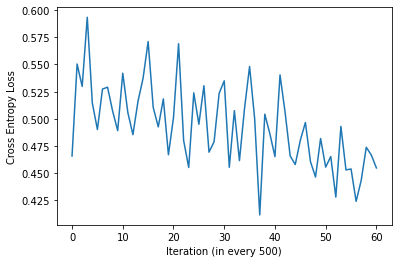

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[74.11696583671106, 74.11696583671106, 74.11696583671106, 74.11696583671106, 74.11696583671106, 74.11696583671106, 74.81181239143022, 74.52229299363057, 74.11696583671106, 74.75390851187029, 74.92762015055008, 75.50665894614939, 74.63810075275043, 74.69600463231036, 73.76954255935148, 75.68037058482918, 74.69600463231036, 74.86971627099015, 75.1592356687898, 74.46438911407064, 75.56456282570932, 75.73827446438911, 75.79617834394904, 75.85408222350898, 74.98552403011001, 74.86971627099015, 76.0856977417487, 76.43312101910828, 75.73827446438911, 76.02779386218877, 74.11696583671106, 75.27504342790967, 76.49102489866821, 76.14360162130863, 75.79617834394904, 75.68037058482918, 75.68037058482918, 76.2594093804285, 75.91198610306891, 76.54892877822815, 75.85408222350898, 75.79617834394904, 76.49102489866821, 74.86971627099015, 76.95425593514766, 76.0856977417487, 75.10133178922987, 75.3329473074696, 76.20150550086856, 75.79617834394904, 75.62246670526925, 75.50665894614939, 75.7382744643891

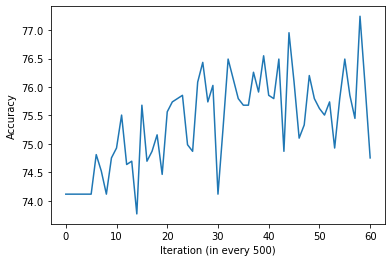

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()